In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error , r2_score
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif , VarianceThreshold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/boston.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Correlation Matrix of All Features

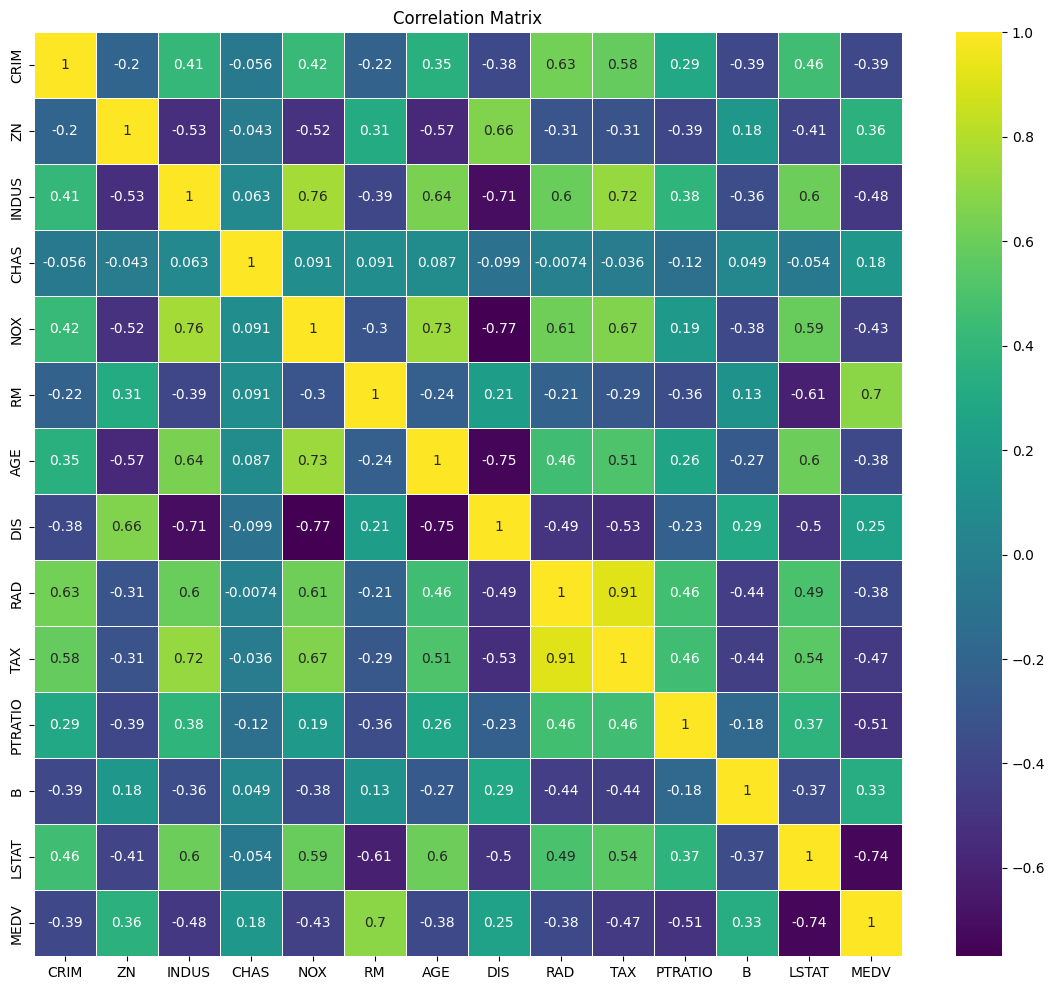

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

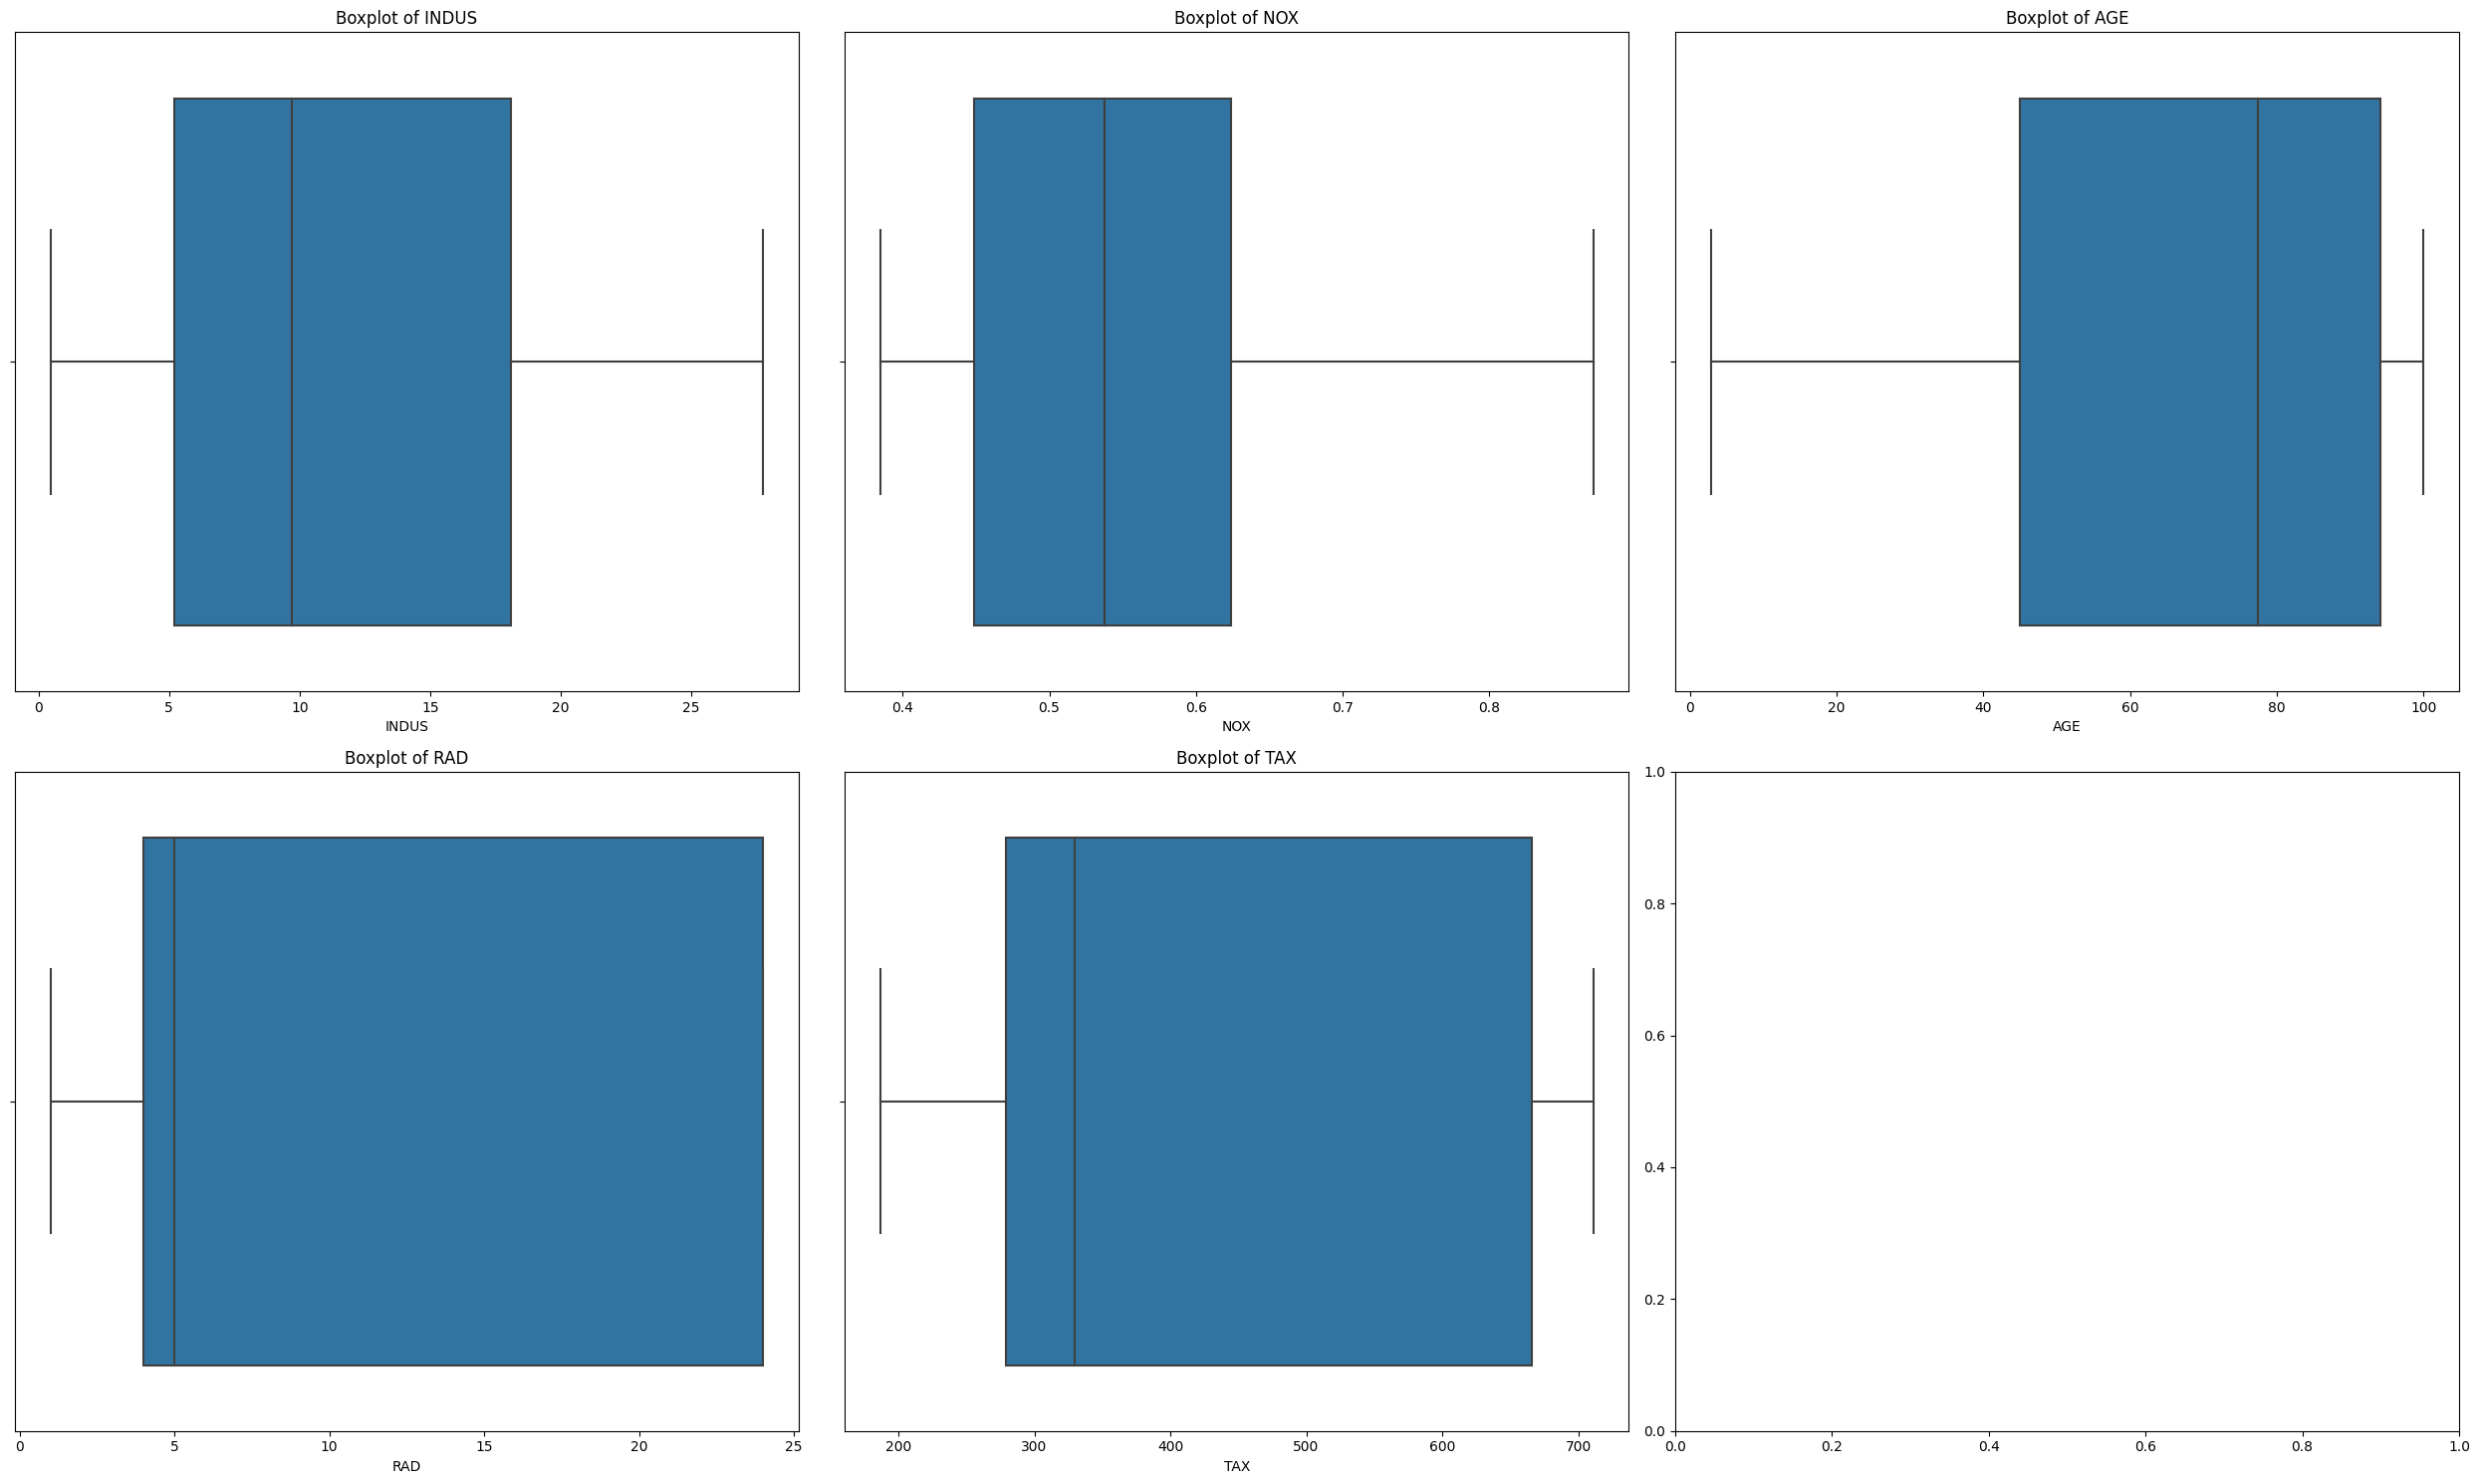

In [ ]:
features = ['INDUS','NOX','AGE', 'RAD', 'TAX']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))

# Create boxplots for each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.boxplot(data=df, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')

# Adjust subplot layout
plt.tight_layout()
plt.show()

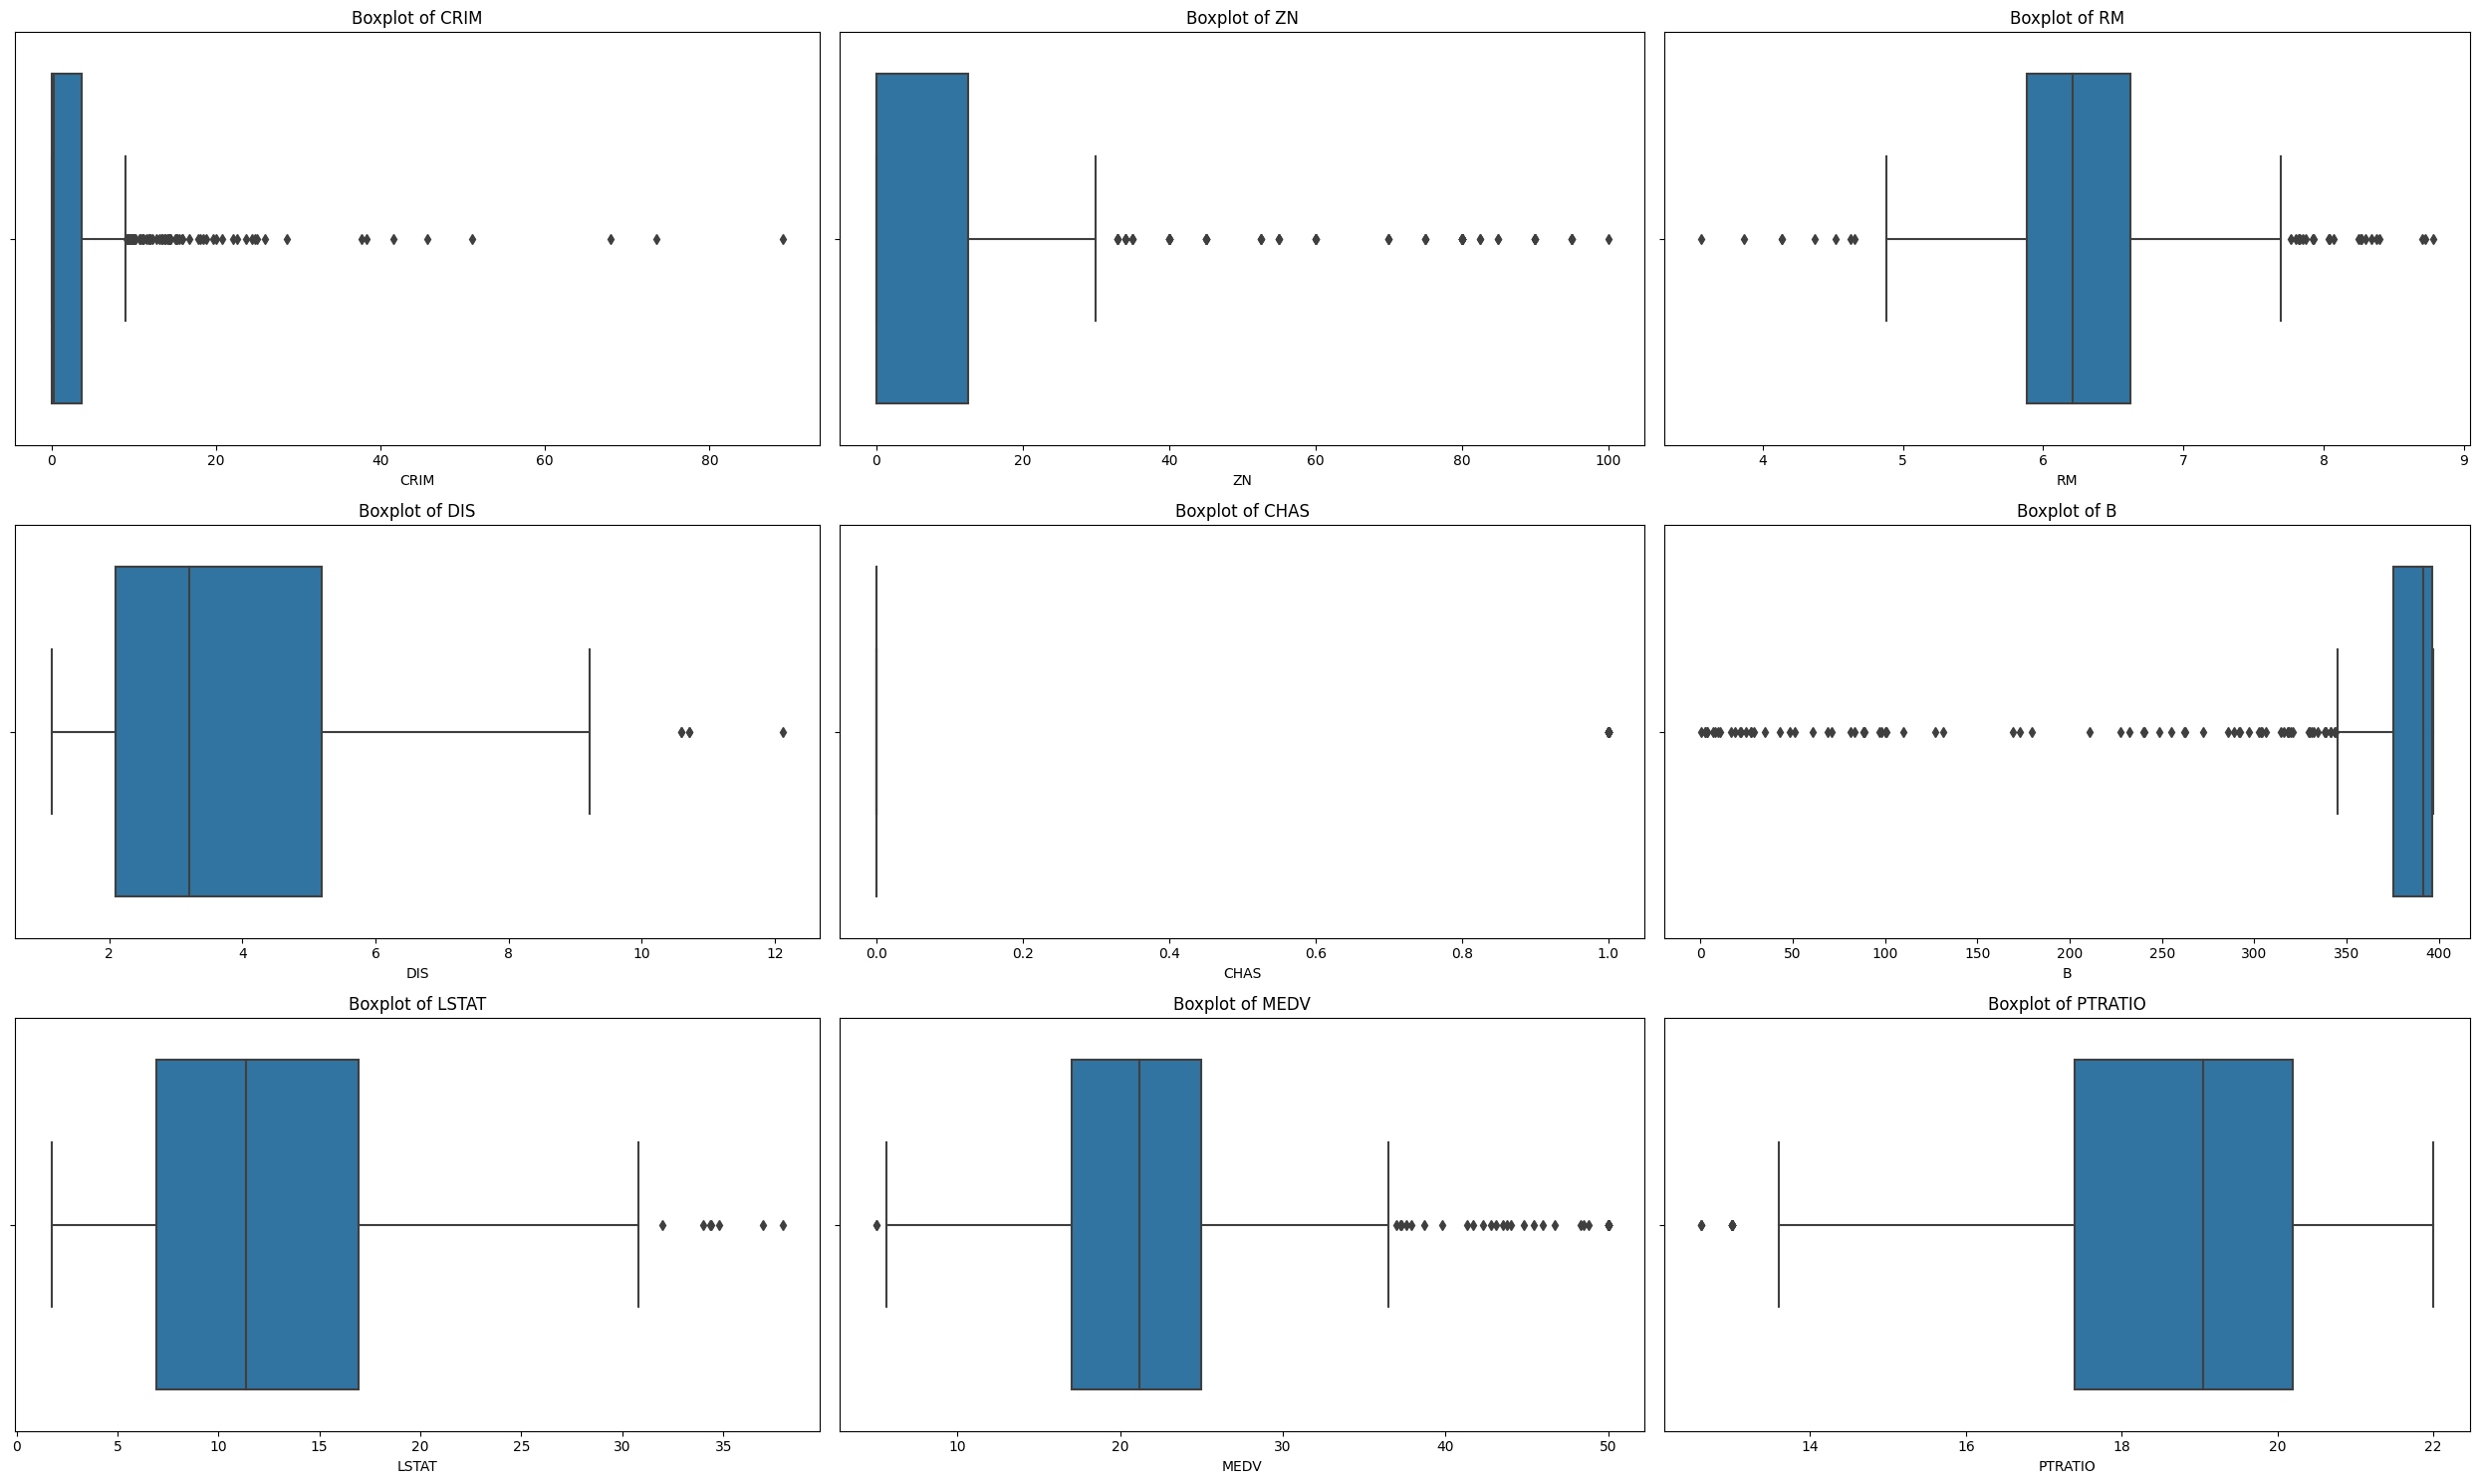

In [ ]:
features = ['CRIM','ZN','RM','DIS','CHAS','B','LSTAT','MEDV','PTRATIO']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))

# Create boxplots for each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.boxplot(data=df, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

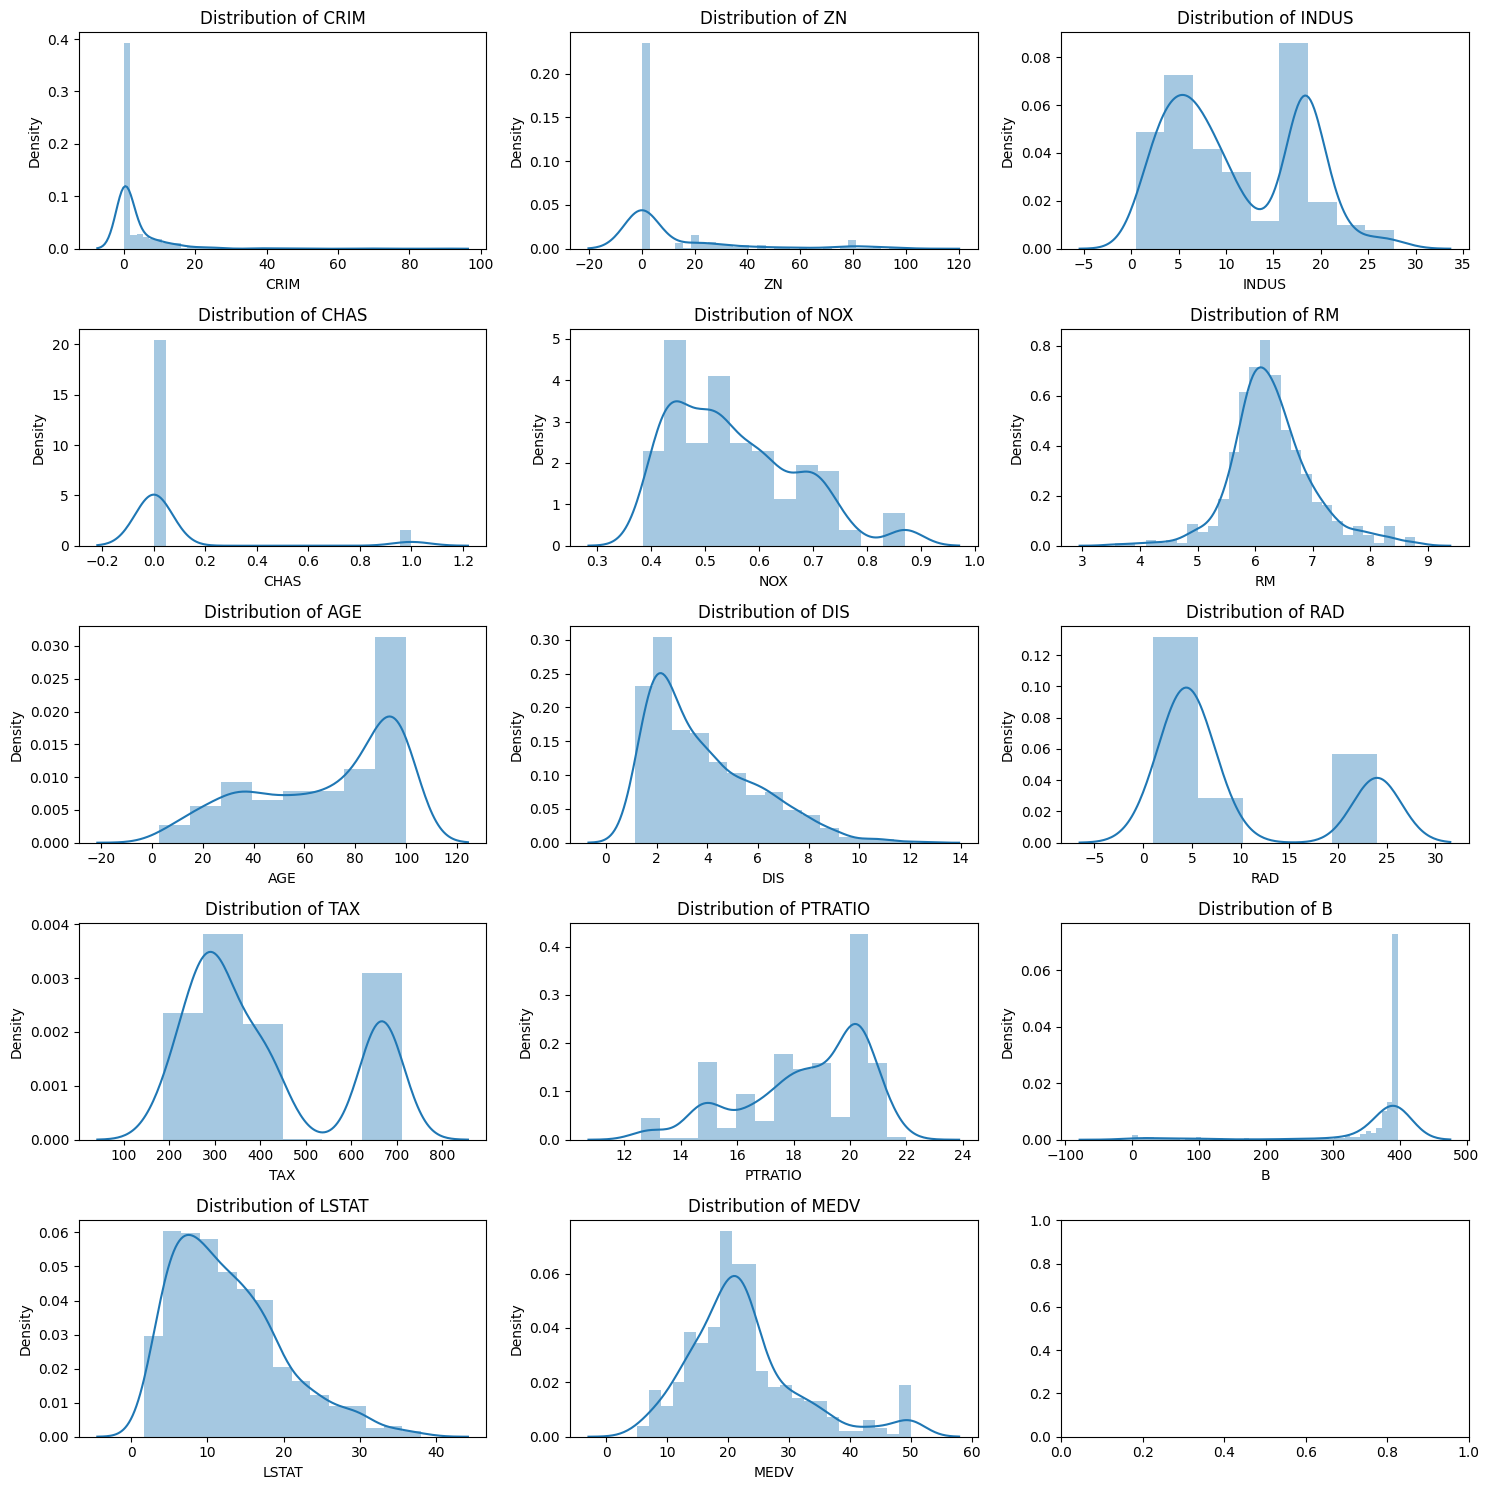

In [ ]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Create distplots for each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.distplot(df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Correlation matrix of all features except MEDV and remove outliers

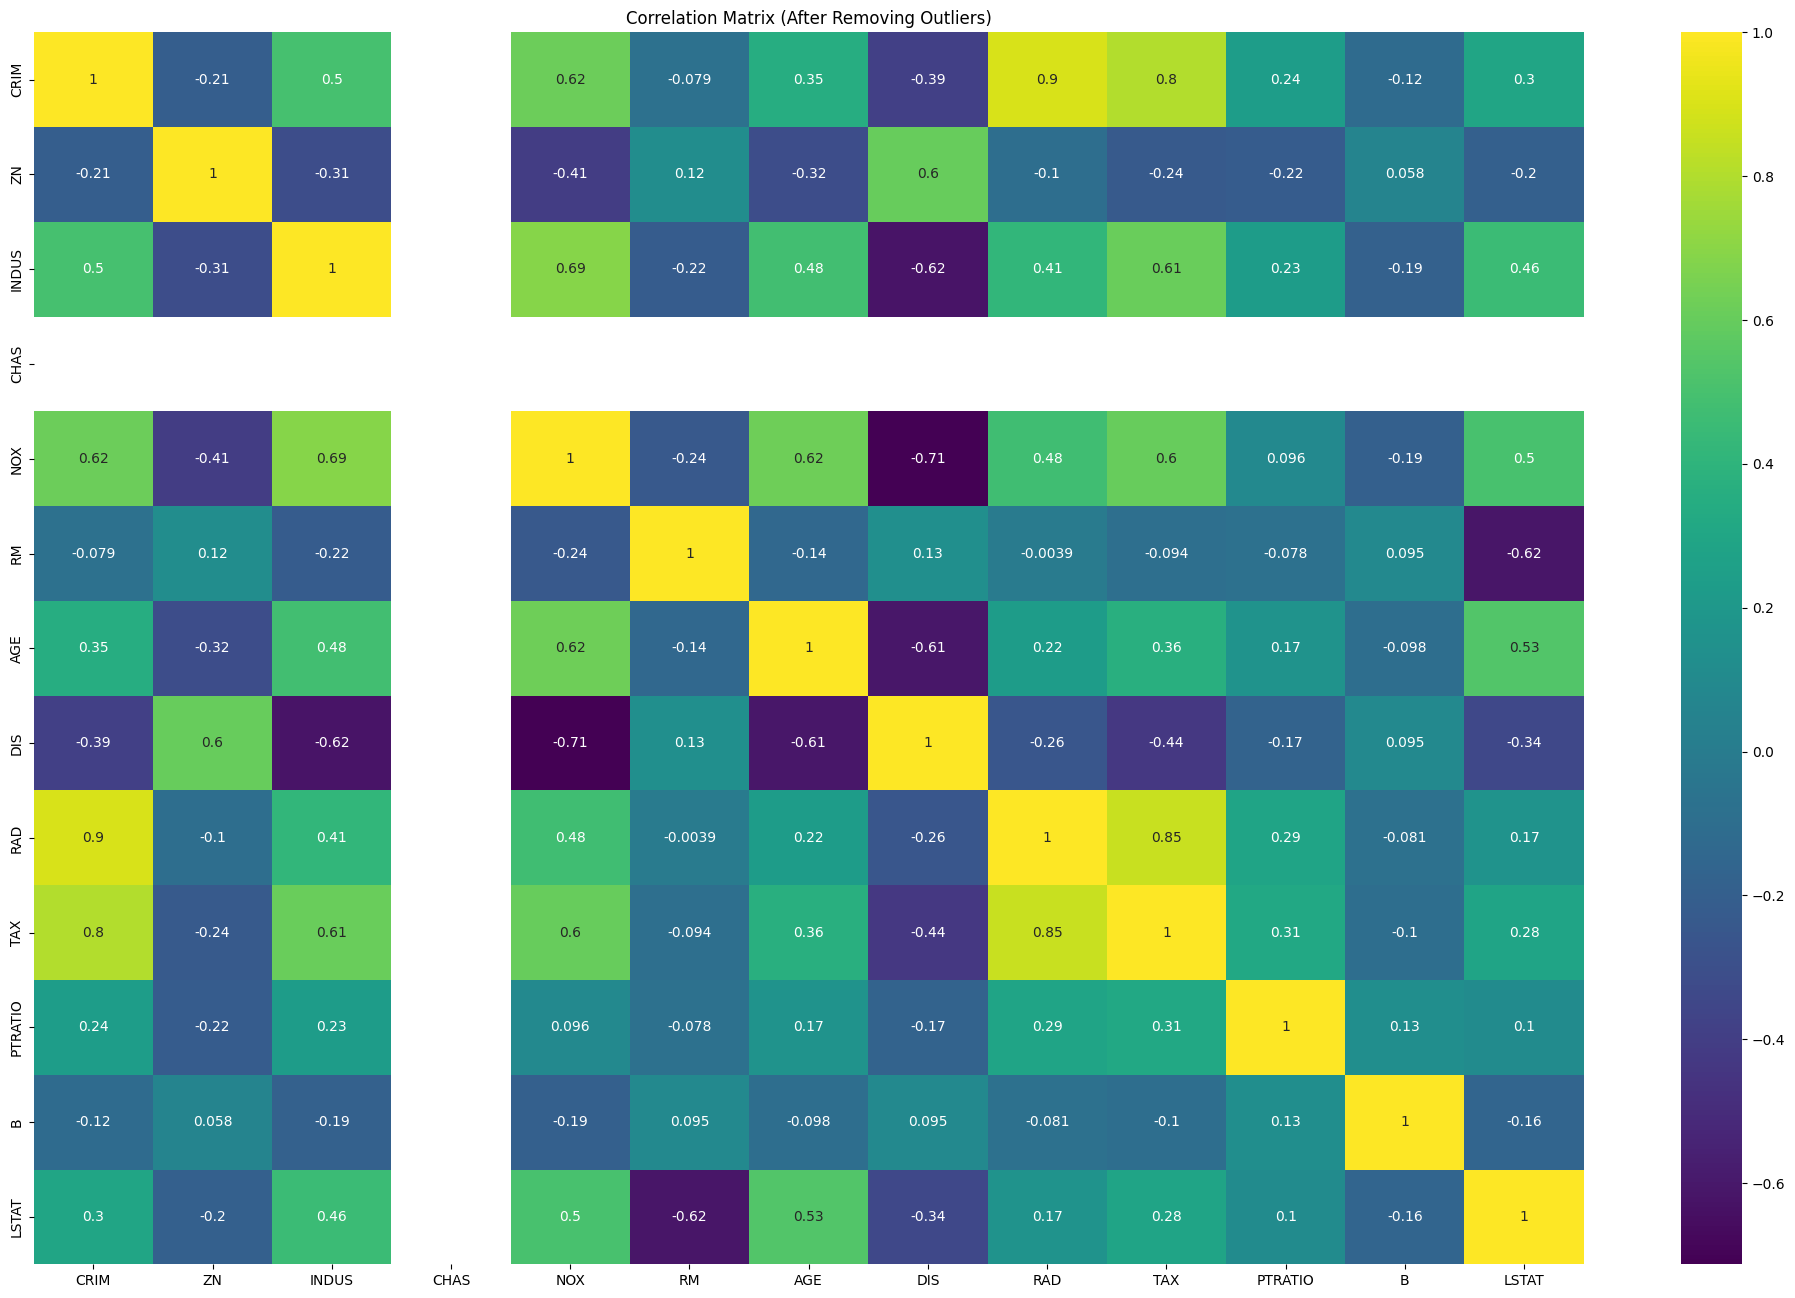

In [ ]:
#Correlation Matrix Between All The Data Without MEDV
X = df.drop(["MEDV"],axis = 1)
Y = df["MEDV"]
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_aligned, _ = X.align(Q1, axis=1, copy=False)
X_aligned, _ = X_aligned.align(Q3, axis=1, copy=False)
outliers_mask = ((X_aligned < (Q1 - 1.5 * IQR)) | (X_aligned > (Q3 + 1.5 * IQR))).any(axis=1)
X_outliers_removed = X[~outliers_mask]

# Visualize the correlation matrix after removing outliers
corr_matrix = X_outliers_removed.corr()
plt.figure(figsize=(25, 16))
plt.title('Correlation Matrix (After Removing Outliers)')
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

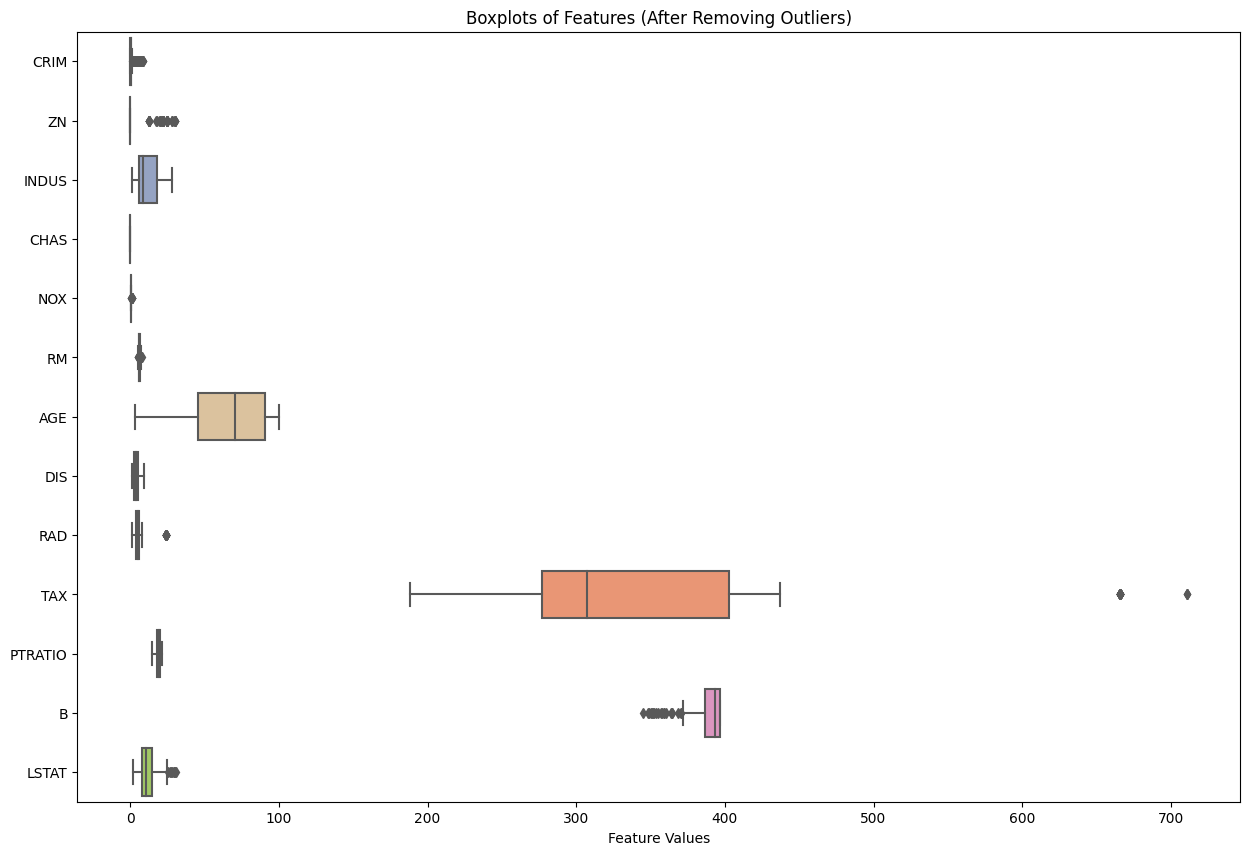

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_outliers_removed, orient="h", palette="Set2")
plt.title('Boxplots of Features (After Removing Outliers)')
plt.xlabel('Feature Values')
plt.show()

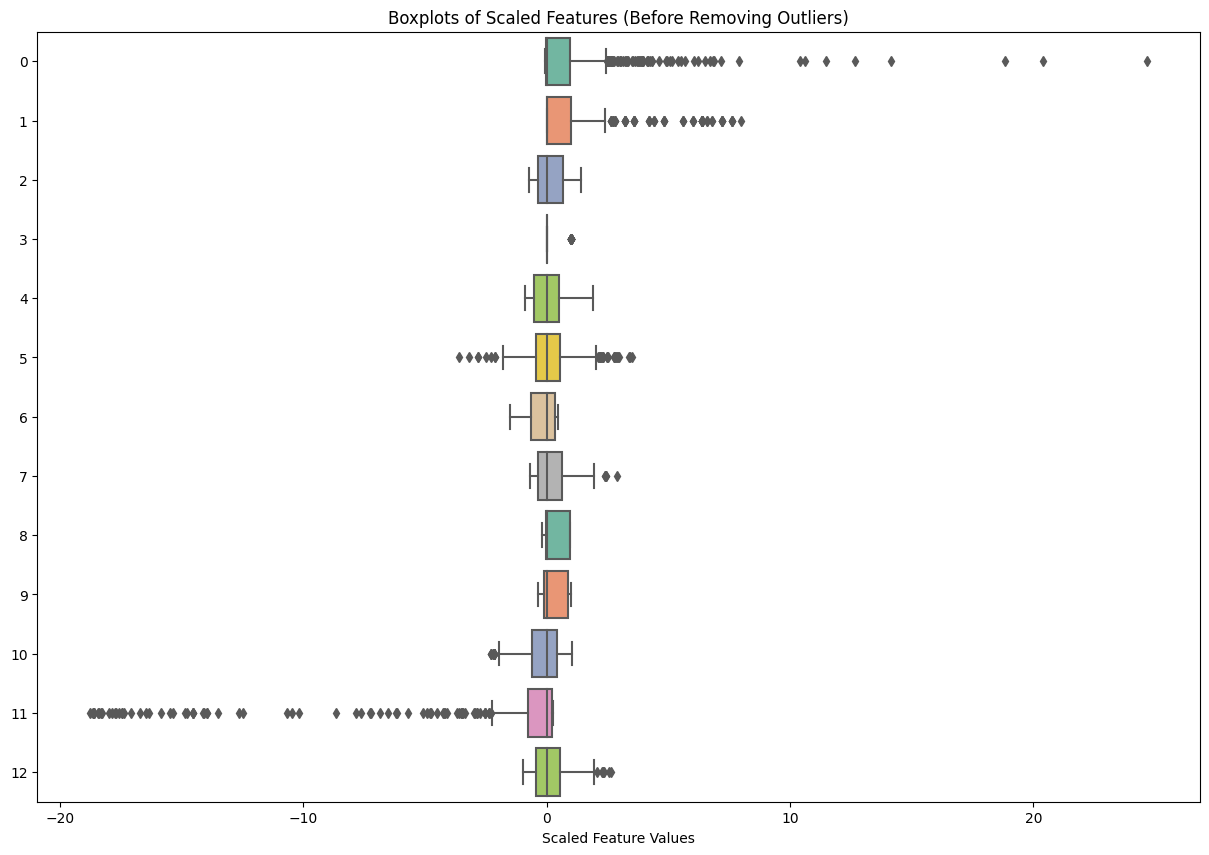

In [ ]:
scaler = RobustScaler()
X_scaled_before = scaler.fit_transform(X)

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_scaled_before, orient="h", palette="Set2")
plt.title('Boxplots of Scaled Features (Before Removing Outliers)')
plt.xlabel('Scaled Feature Values')
plt.show()

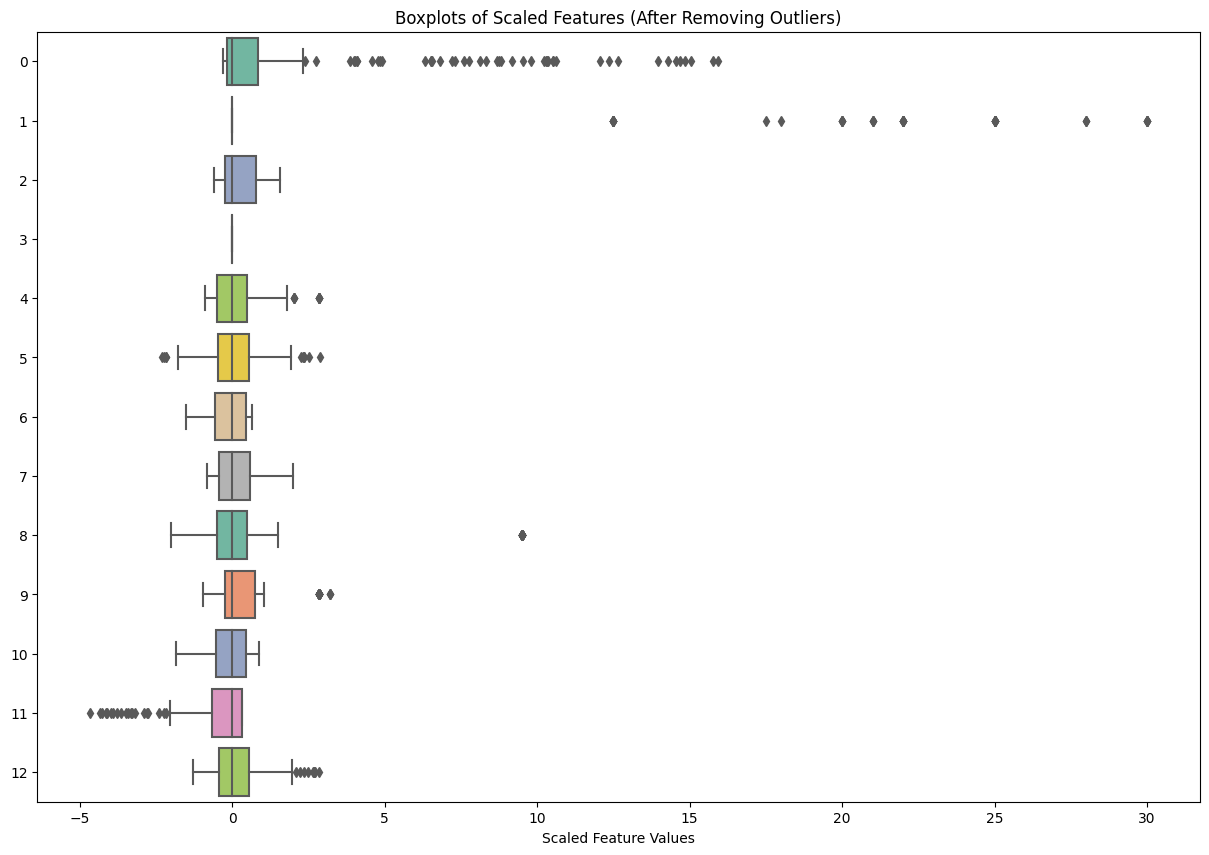

In [ ]:
scaler = RobustScaler()
X_scaled_after = scaler.fit_transform(X_outliers_removed)

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_scaled_after, orient="h", palette="Set2")
plt.title('Boxplots of Scaled Features (After Removing Outliers)')
plt.xlabel('Scaled Feature Values')
plt.show()

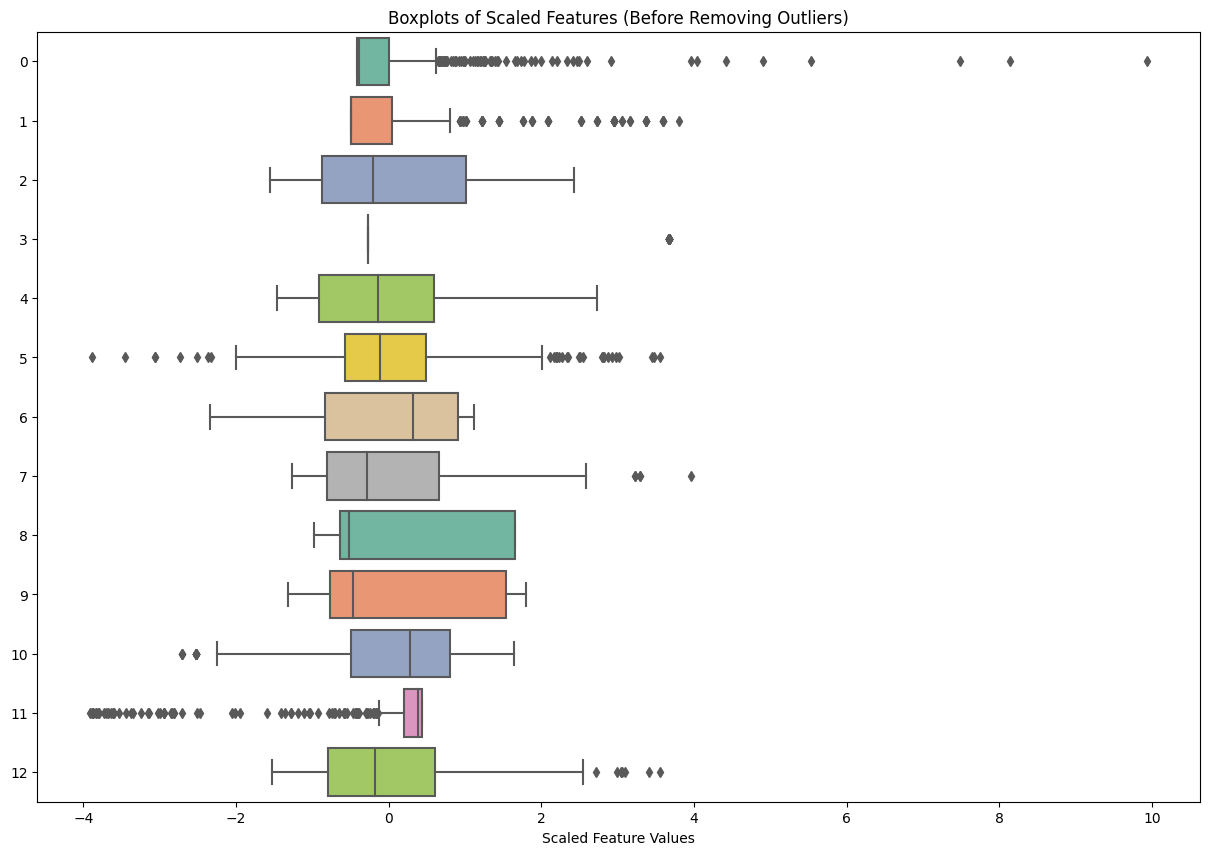

In [ ]:
scaler = StandardScaler()
X_standard_before = scaler.fit_transform(X)

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_standard_before, orient="h", palette="Set2")
plt.title('Boxplots of Scaled Features (Before Removing Outliers)')
plt.xlabel('Scaled Feature Values')
plt.show()

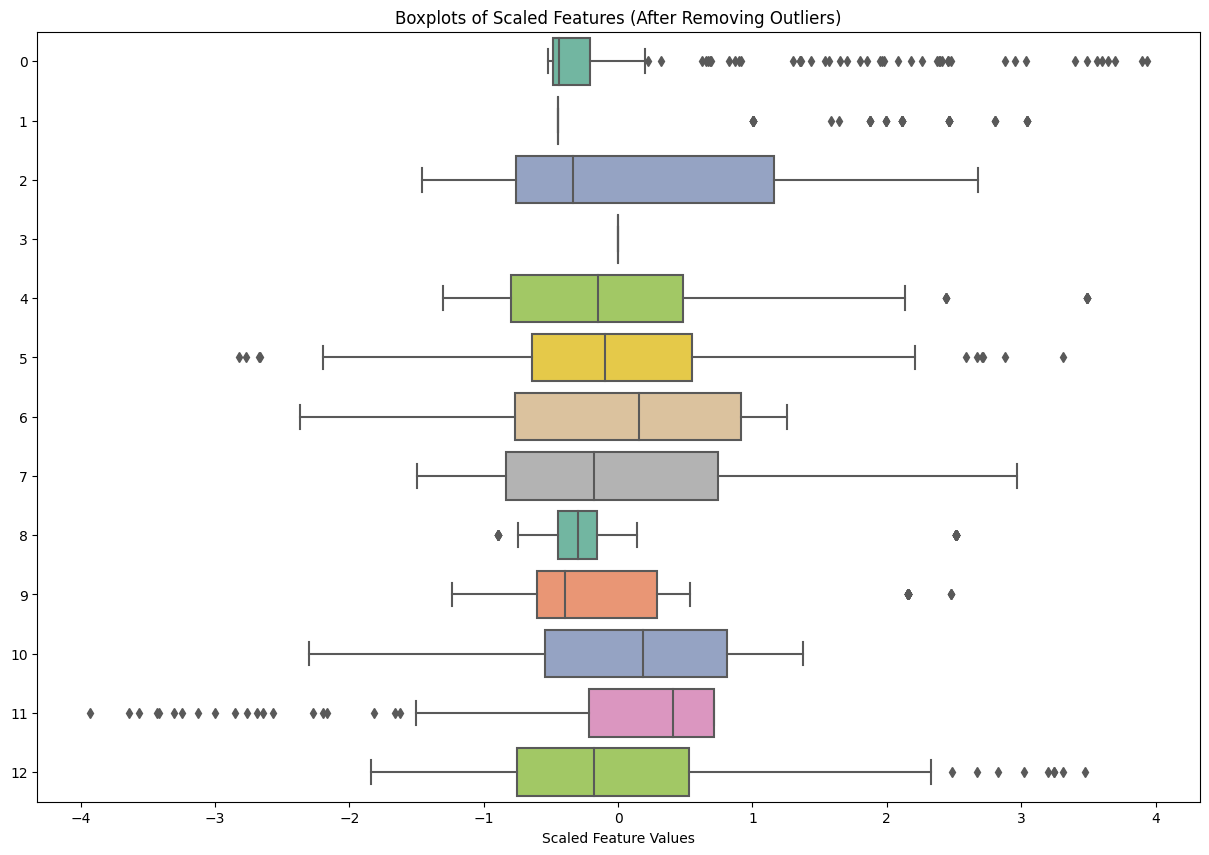

In [ ]:
scaler = StandardScaler()
X_standard_after = scaler.fit_transform(X_outliers_removed)

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_standard_after, orient="h", palette="Set2")
plt.title('Boxplots of Scaled Features (After Removing Outliers)')
plt.xlabel('Scaled Feature Values')
plt.show()

Merging outliers to max/min

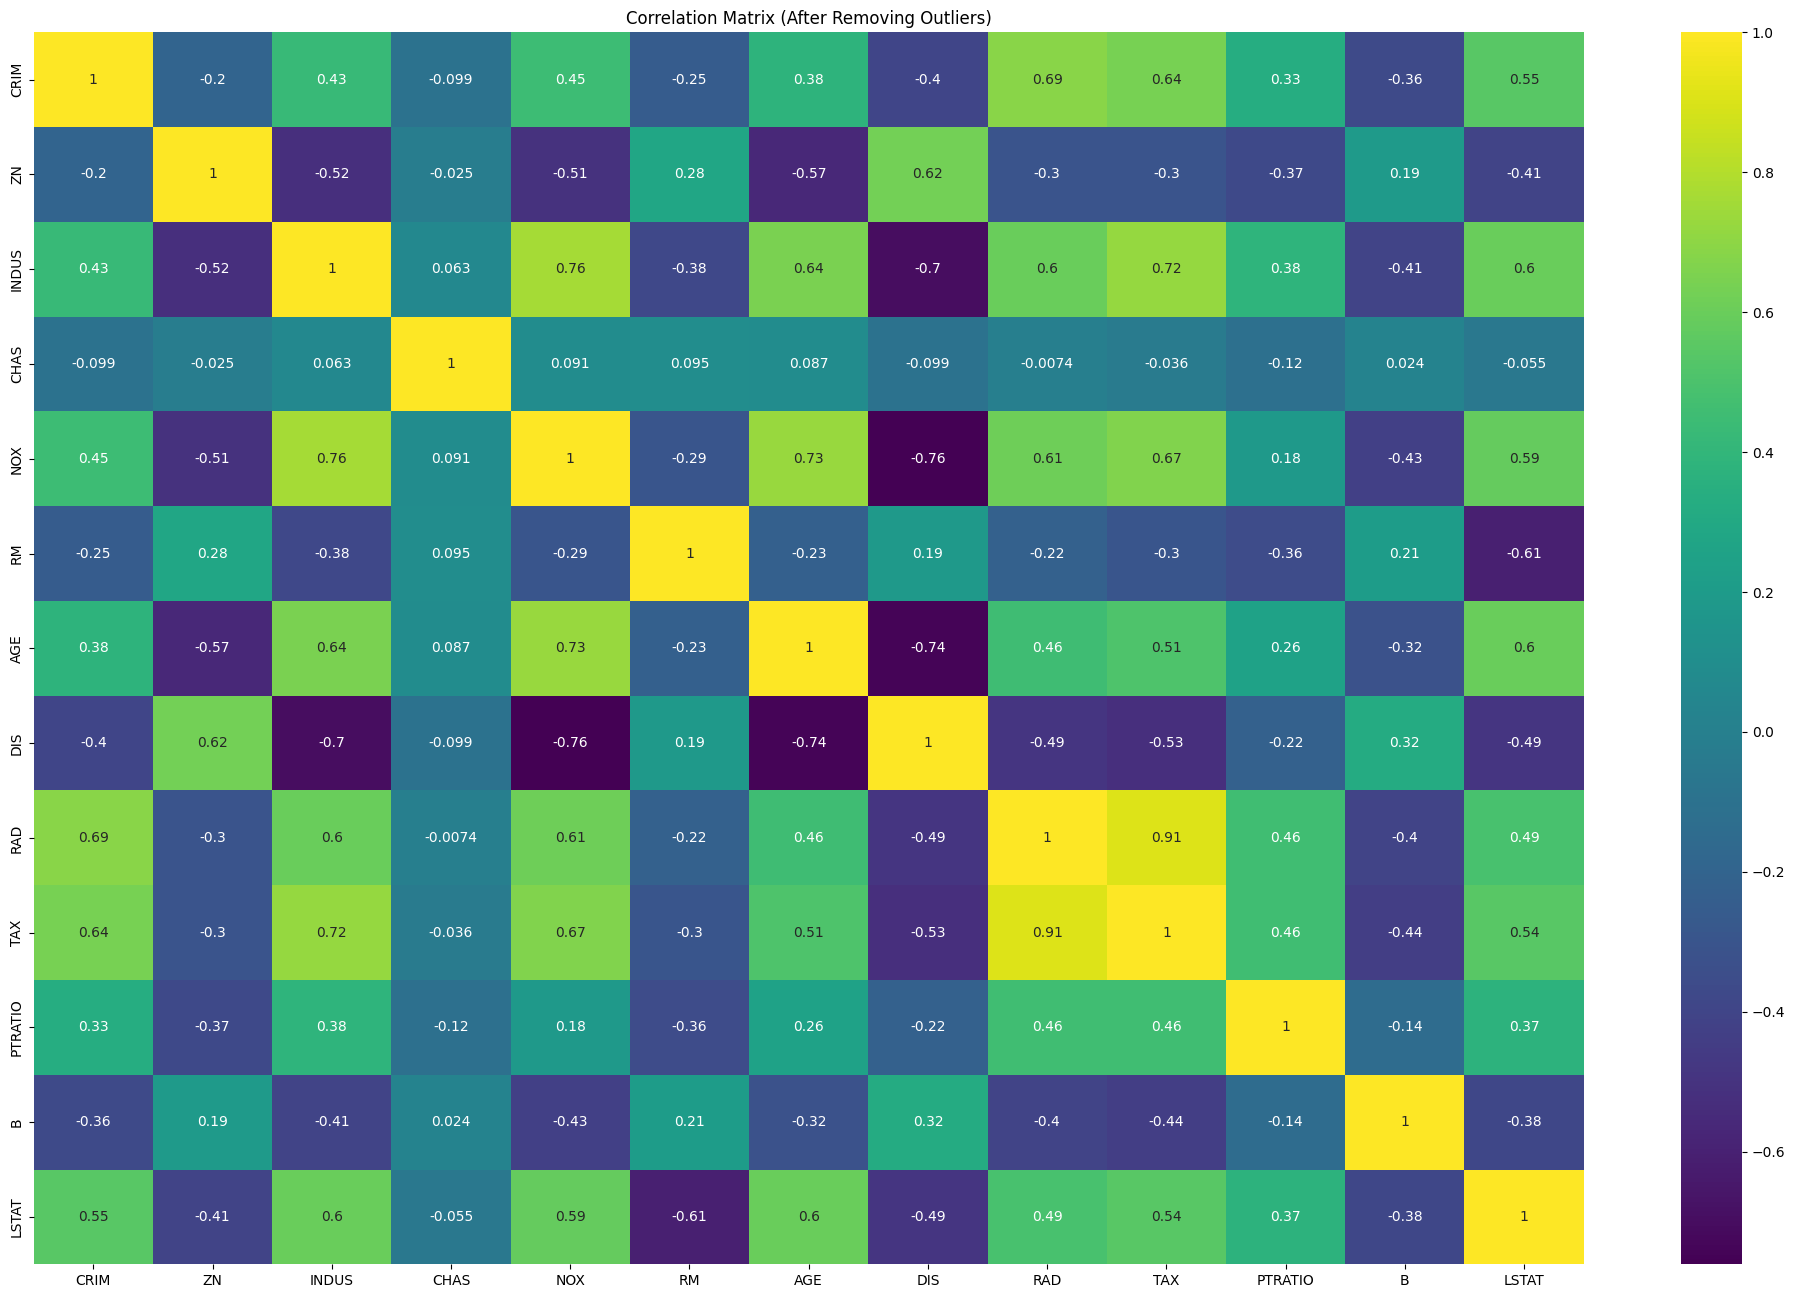

In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_outliers_merged = X.copy()
for column in X.columns:
    X_outliers_merged[column] = np.where(X_outliers_merged[column] < lower_bound[column], X_outliers_merged[column].min(), X_outliers_merged[column])
    X_outliers_merged[column] = np.where(X_outliers_merged[column] > upper_bound[column], X_outliers_merged[column].max(), X_outliers_merged[column])

corr_matrix = X_outliers_merged.corr()
plt.figure(figsize=(25, 16))
plt.title('Correlation Matrix (After Removing Outliers)')
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

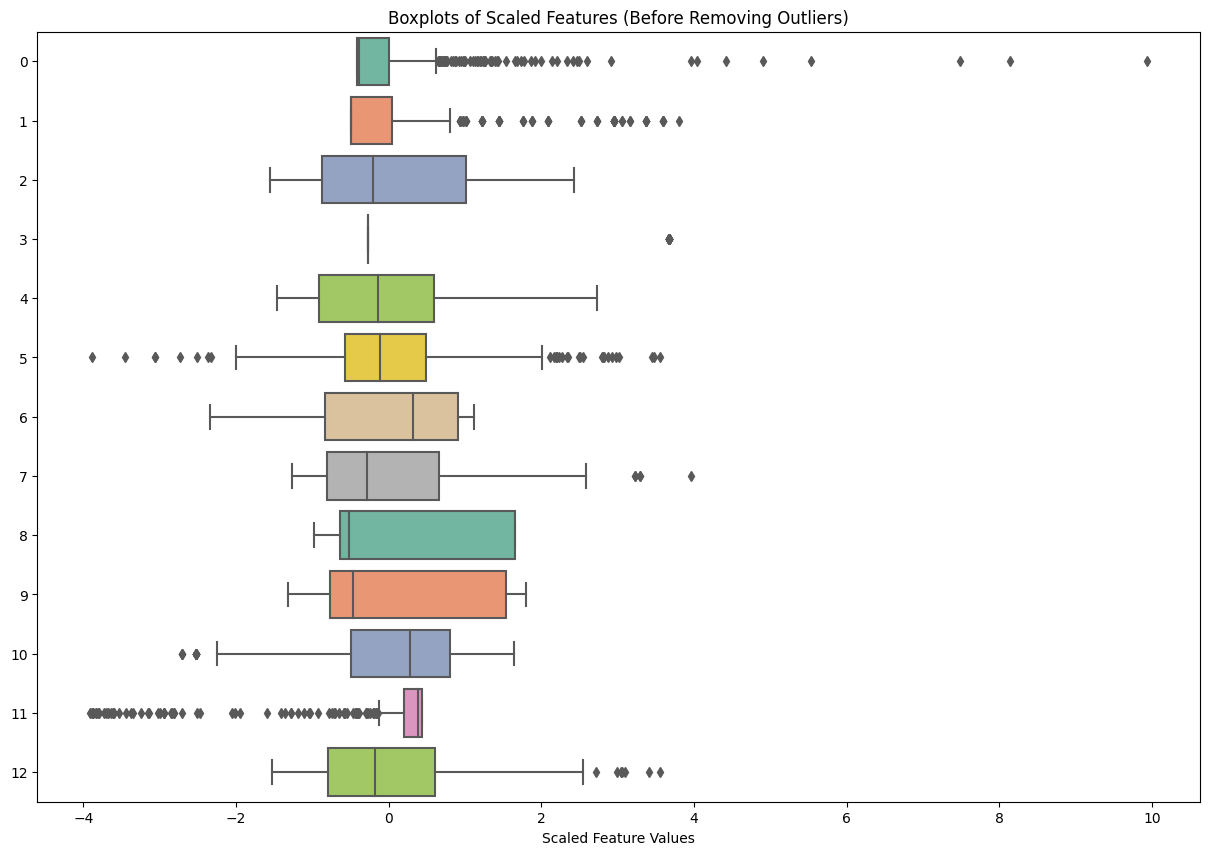

In [ ]:
scaler = StandardScaler()
X_standard_before_merged = scaler.fit_transform(X)

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_standard_before_merged, orient="h", palette="Set2")
plt.title('Boxplots of Scaled Features (Before Removing Outliers)')
plt.xlabel('Scaled Feature Values')
plt.show()

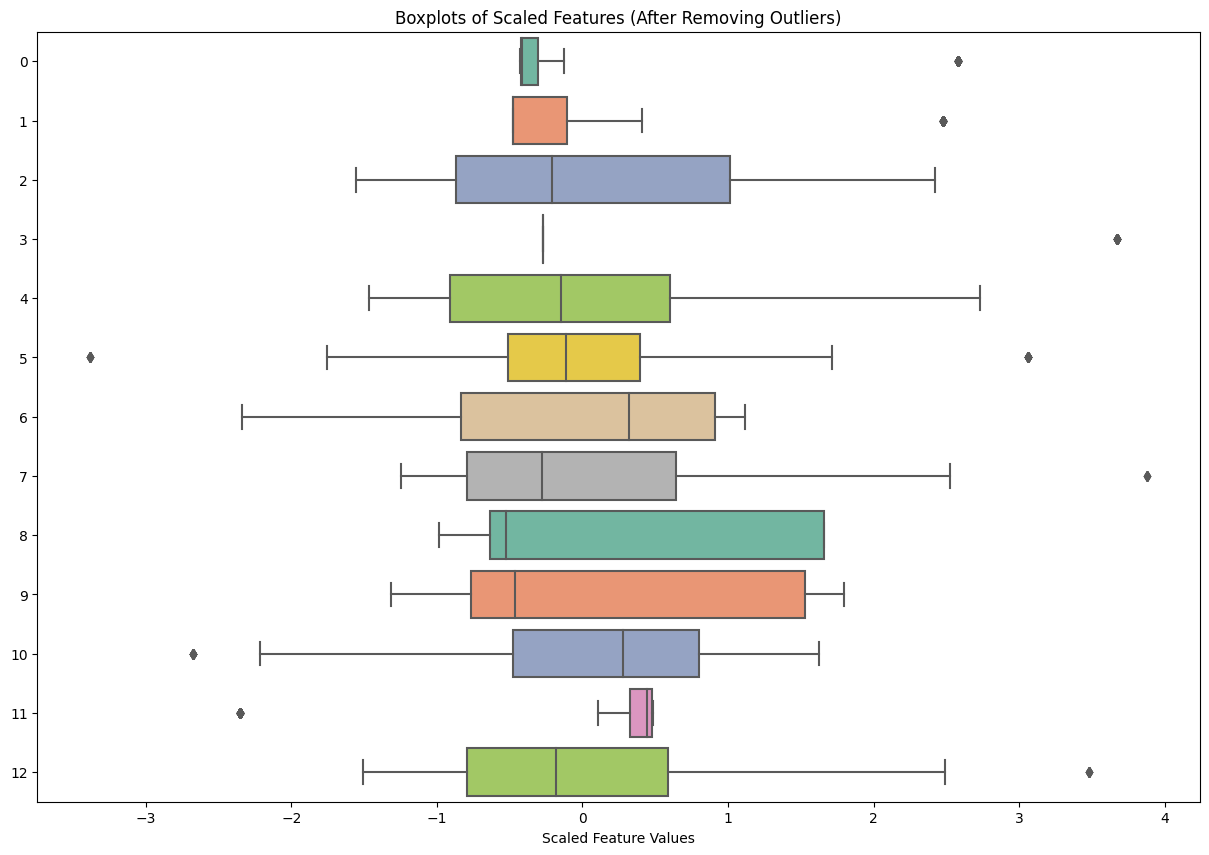

In [ ]:
scaler = StandardScaler()
X_standard_after_merged = scaler.fit_transform(X_outliers_merged)

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_standard_after_merged, orient="h", palette="Set2")
plt.title('Boxplots of Scaled Features (After Removing Outliers)')
plt.xlabel('Scaled Feature Values')
plt.show()

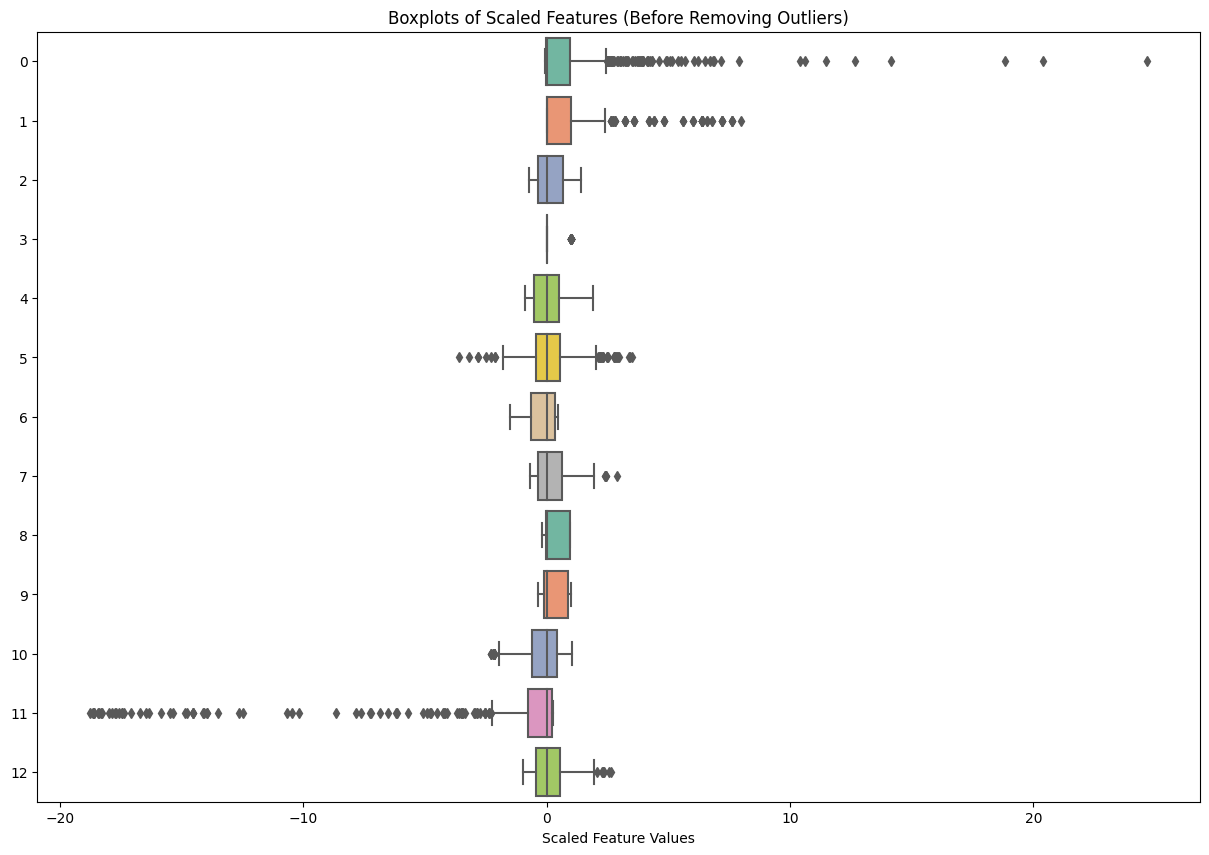

In [ ]:
scaler = RobustScaler()
X_scaled_before_merged = scaler.fit_transform(X)

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_scaled_before_merged, orient="h", palette="Set2")
plt.title('Boxplots of Scaled Features (Before Removing Outliers)')
plt.xlabel('Scaled Feature Values')
plt.show()

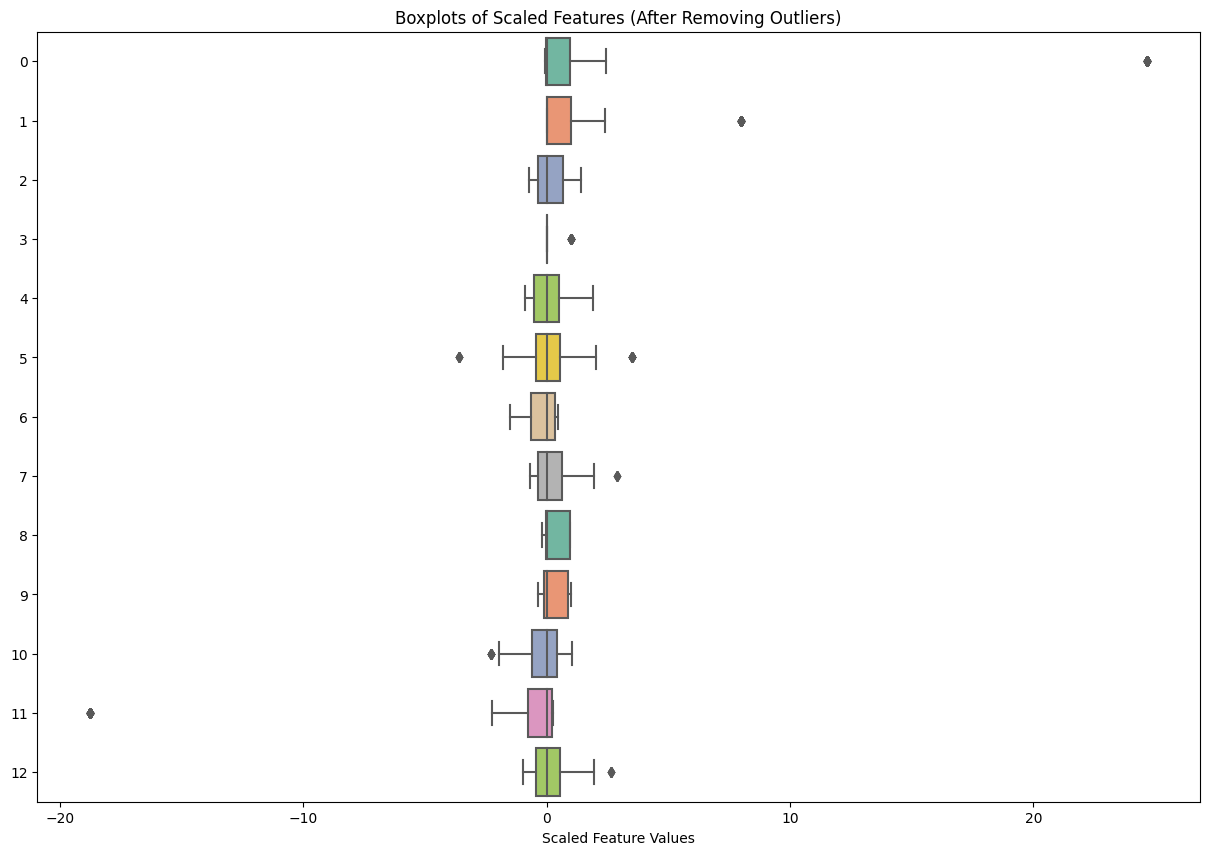

In [ ]:
scaler = RobustScaler()
X_scaled_after_merged = scaler.fit_transform(X_outliers_merged)

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_scaled_after_merged, orient="h", palette="Set2")
plt.title('Boxplots of Scaled Features (After Removing Outliers)')
plt.xlabel('Scaled Feature Values')
plt.show()

Selecting The best 5 Features

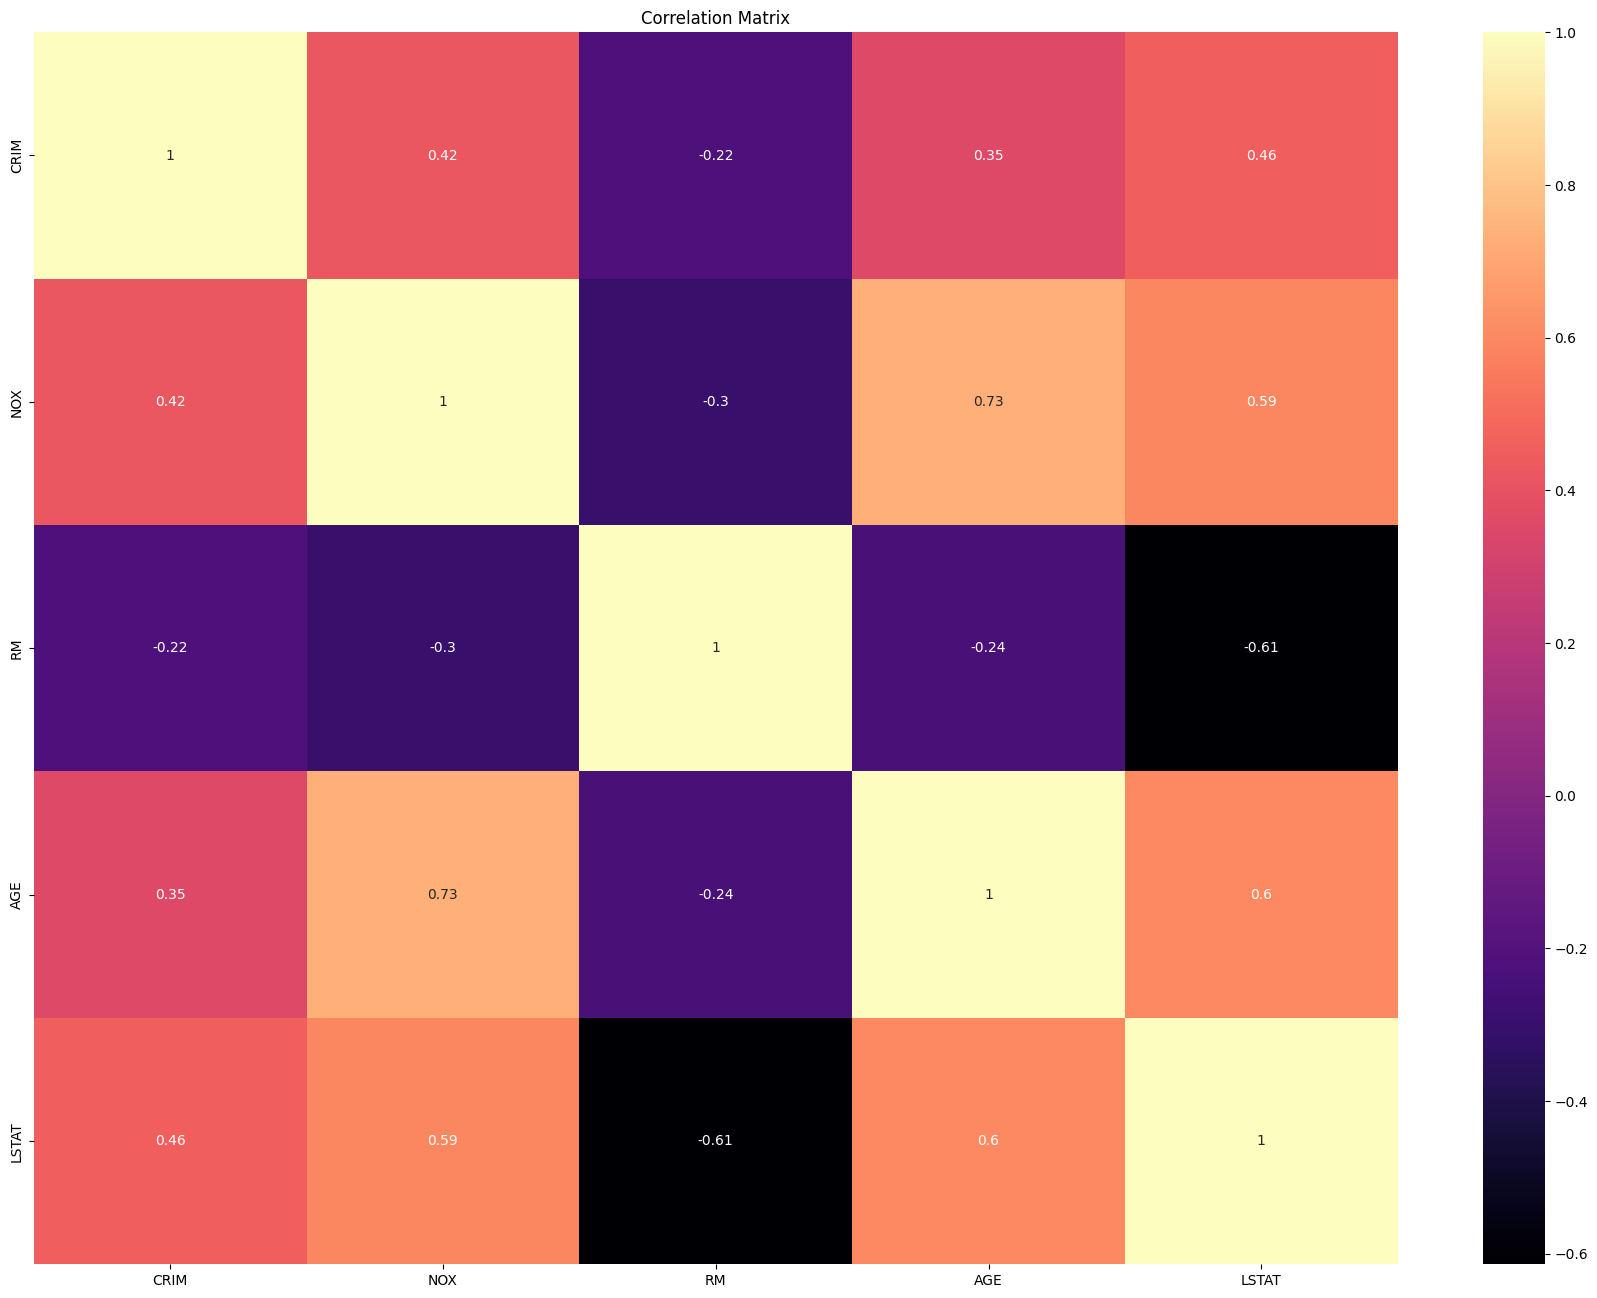

In [ ]:
#Select Best 5 Features Before Removing Outliers
X_selectk = df.drop(["CHAS","MEDV"],axis = 1)
selector = SelectKBest(f_classif,k=5)
selector.fit(X_selectk,Y)
selected_columns = selector.get_support(indices=True)
X_best = X_selectk.iloc[:, selected_columns]

corr_matrix = X_best.corr()
plt.figure(figsize=(22, 16))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.show()

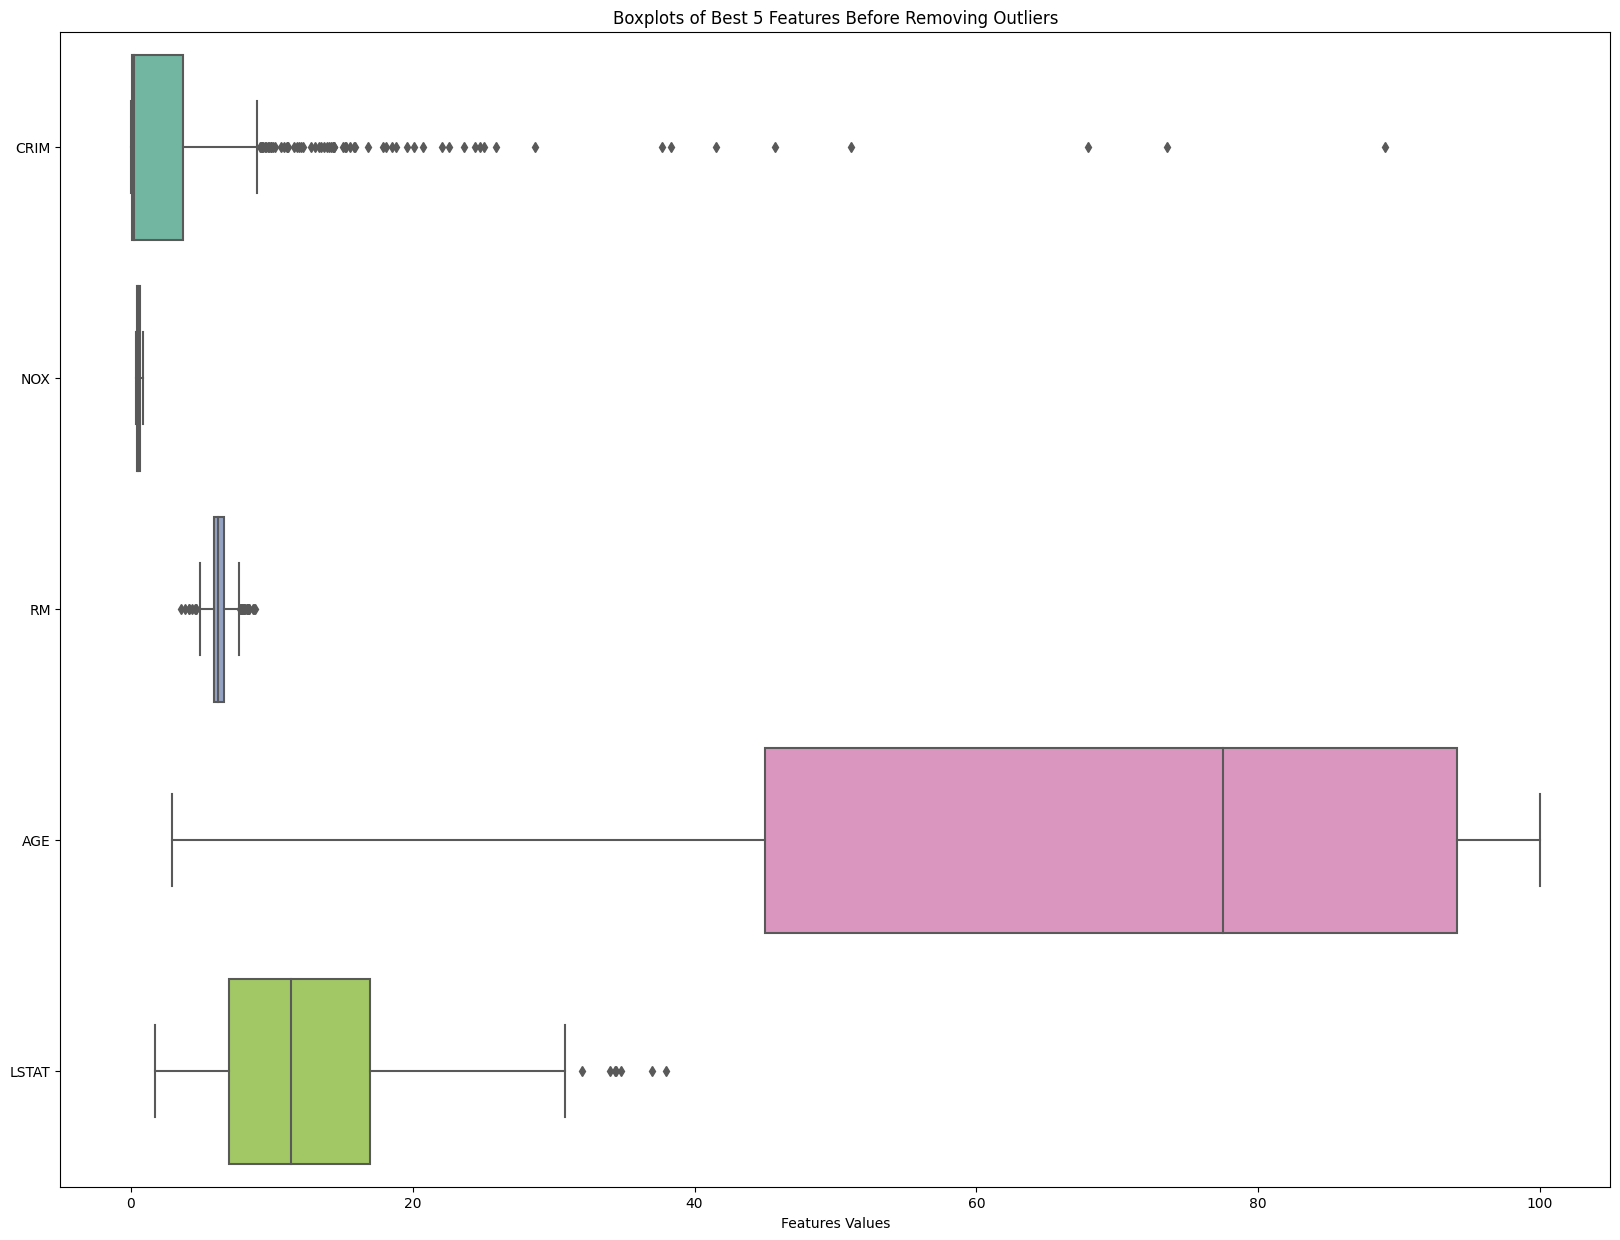

In [ ]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_best, orient="h", palette="Set2")
plt.title('Boxplots of Best 5 Features Before Removing Outliers')
plt.xlabel('Features Values')
plt.show()

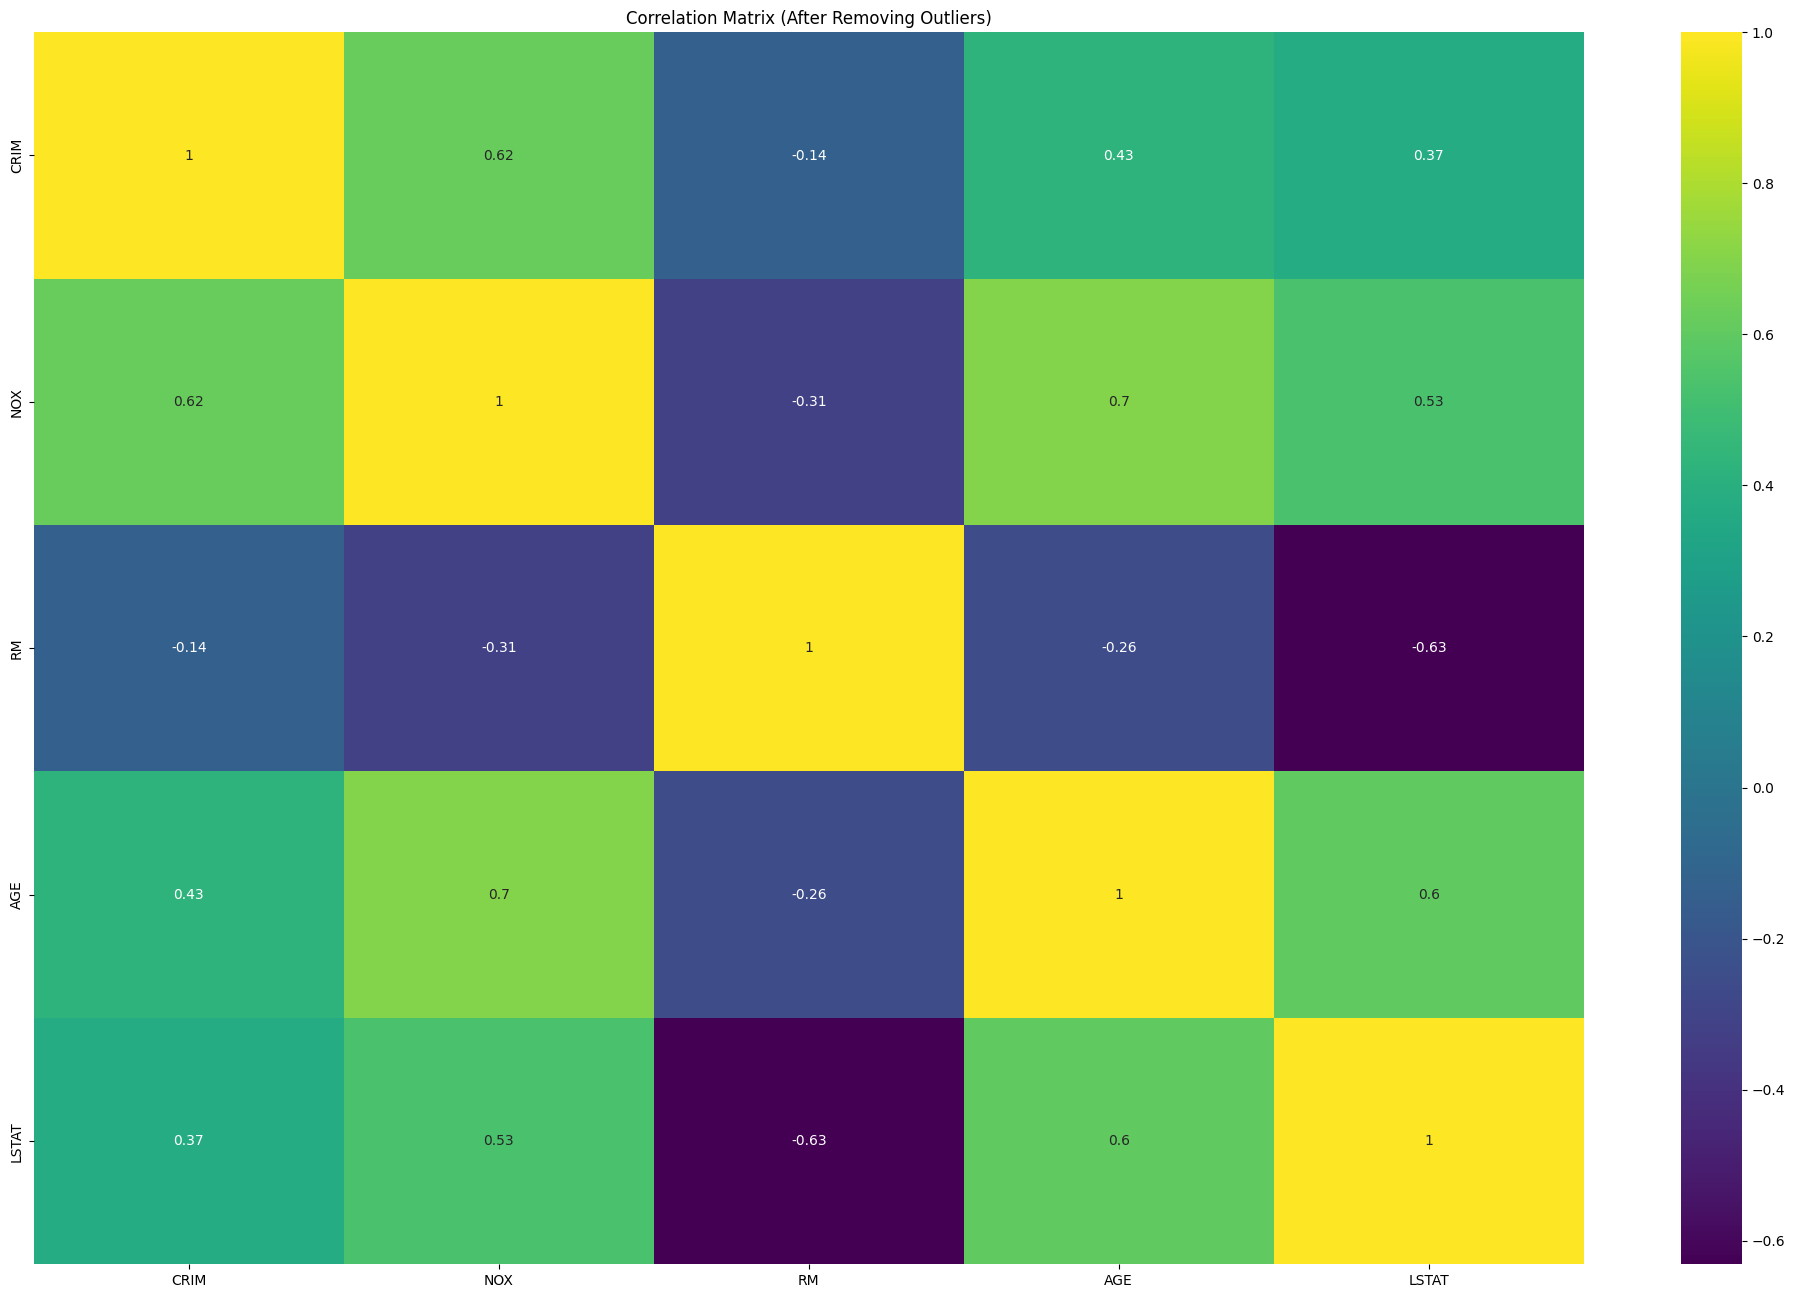

In [ ]:
Q1 = X_best.quantile(0.25)
Q3 = X_best.quantile(0.75)
IQR = Q3 - Q1
X_remove_outliers_best = X_best[~((X_best < (Q1 - 1.5 * IQR)) | (X_best > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize the correlation matrix after removing outliers
corr_matrix = X_remove_outliers_best.corr()
plt.figure(figsize=(25, 16))
plt.title('Correlation Matrix (After Removing Outliers)')
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

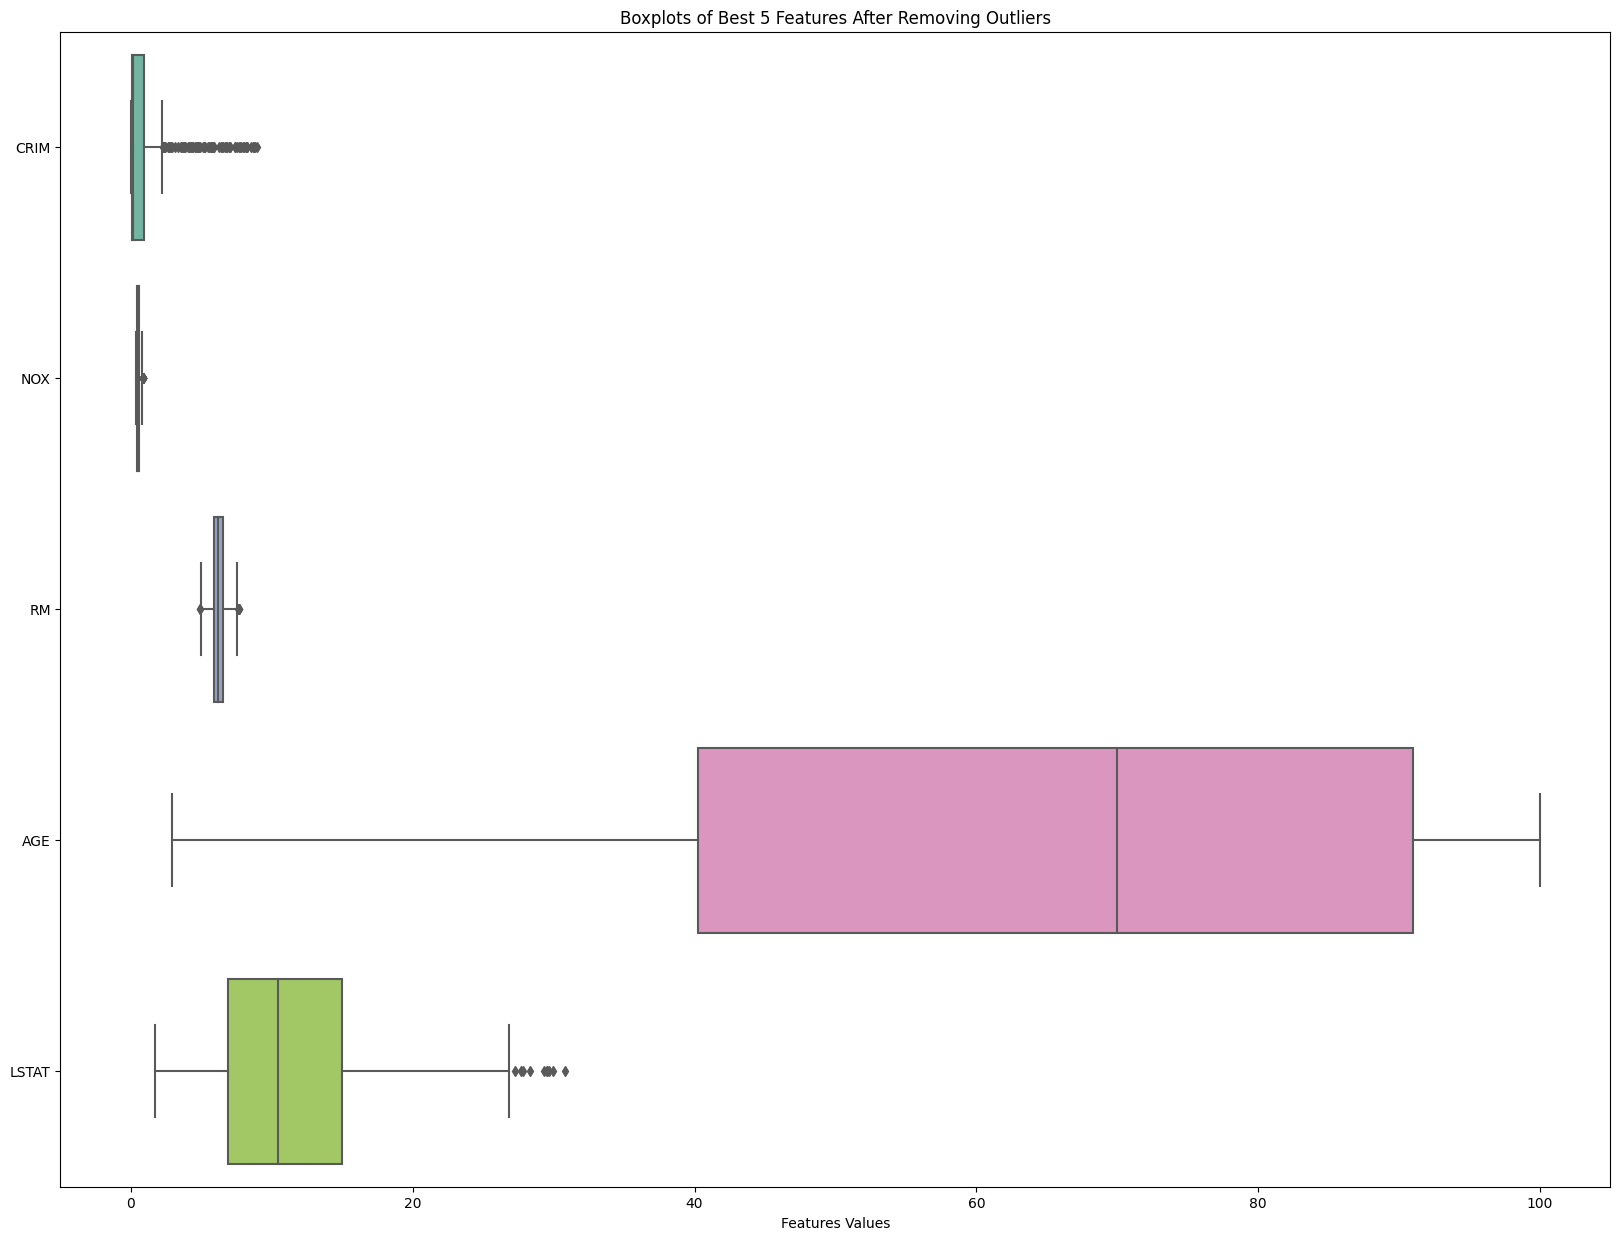

In [ ]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_remove_outliers_best, orient="h", palette="Set2")
plt.title('Boxplots of Best 5 Features After Removing Outliers')
plt.xlabel('Features Values')
plt.show()

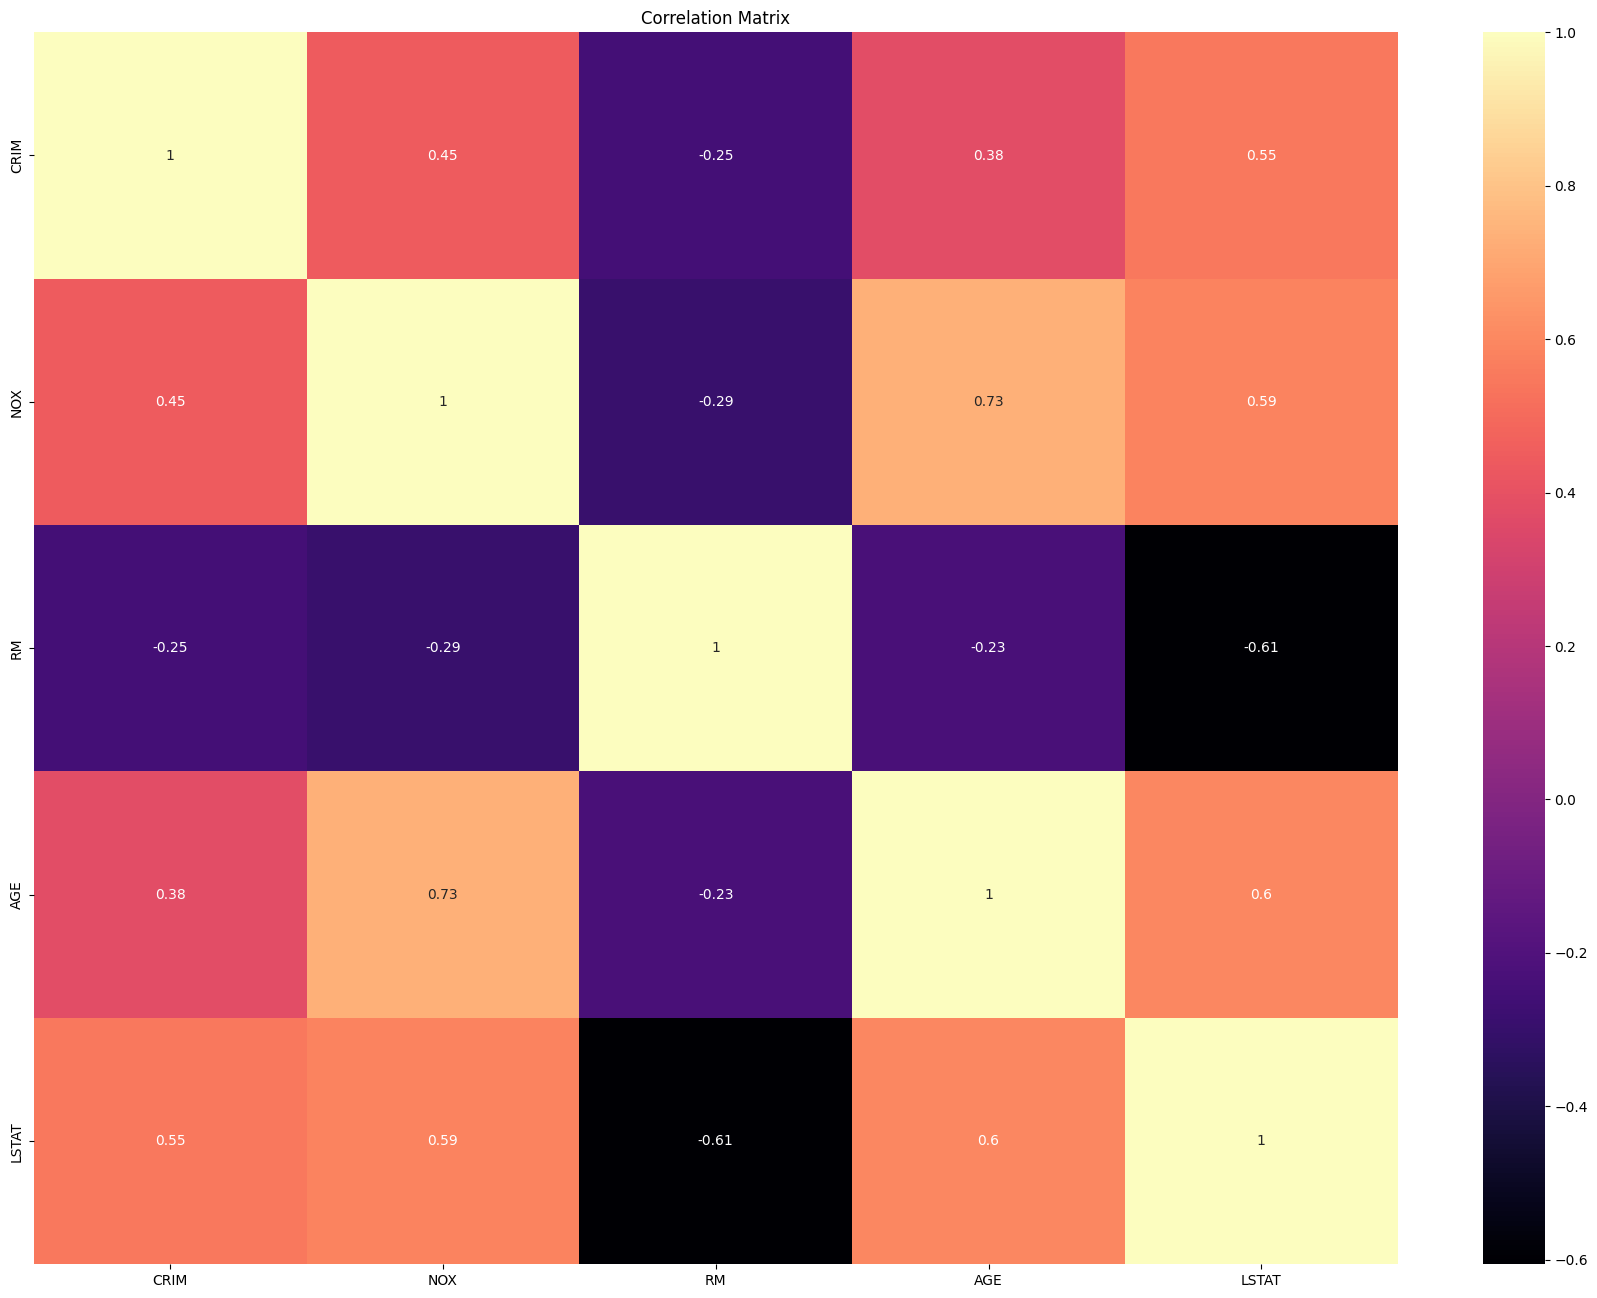

In [ ]:
#Select Best 5 Features After Merging Outliers
selector = SelectKBest(f_classif,k=5)
selector.fit(X_outliers_merged,Y)
selected_columns = selector.get_support(indices=True)
X_best_merged = X_outliers_merged.iloc[:, selected_columns]

corr_matrix = X_best_merged.corr()
plt.figure(figsize=(22, 16))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.show()

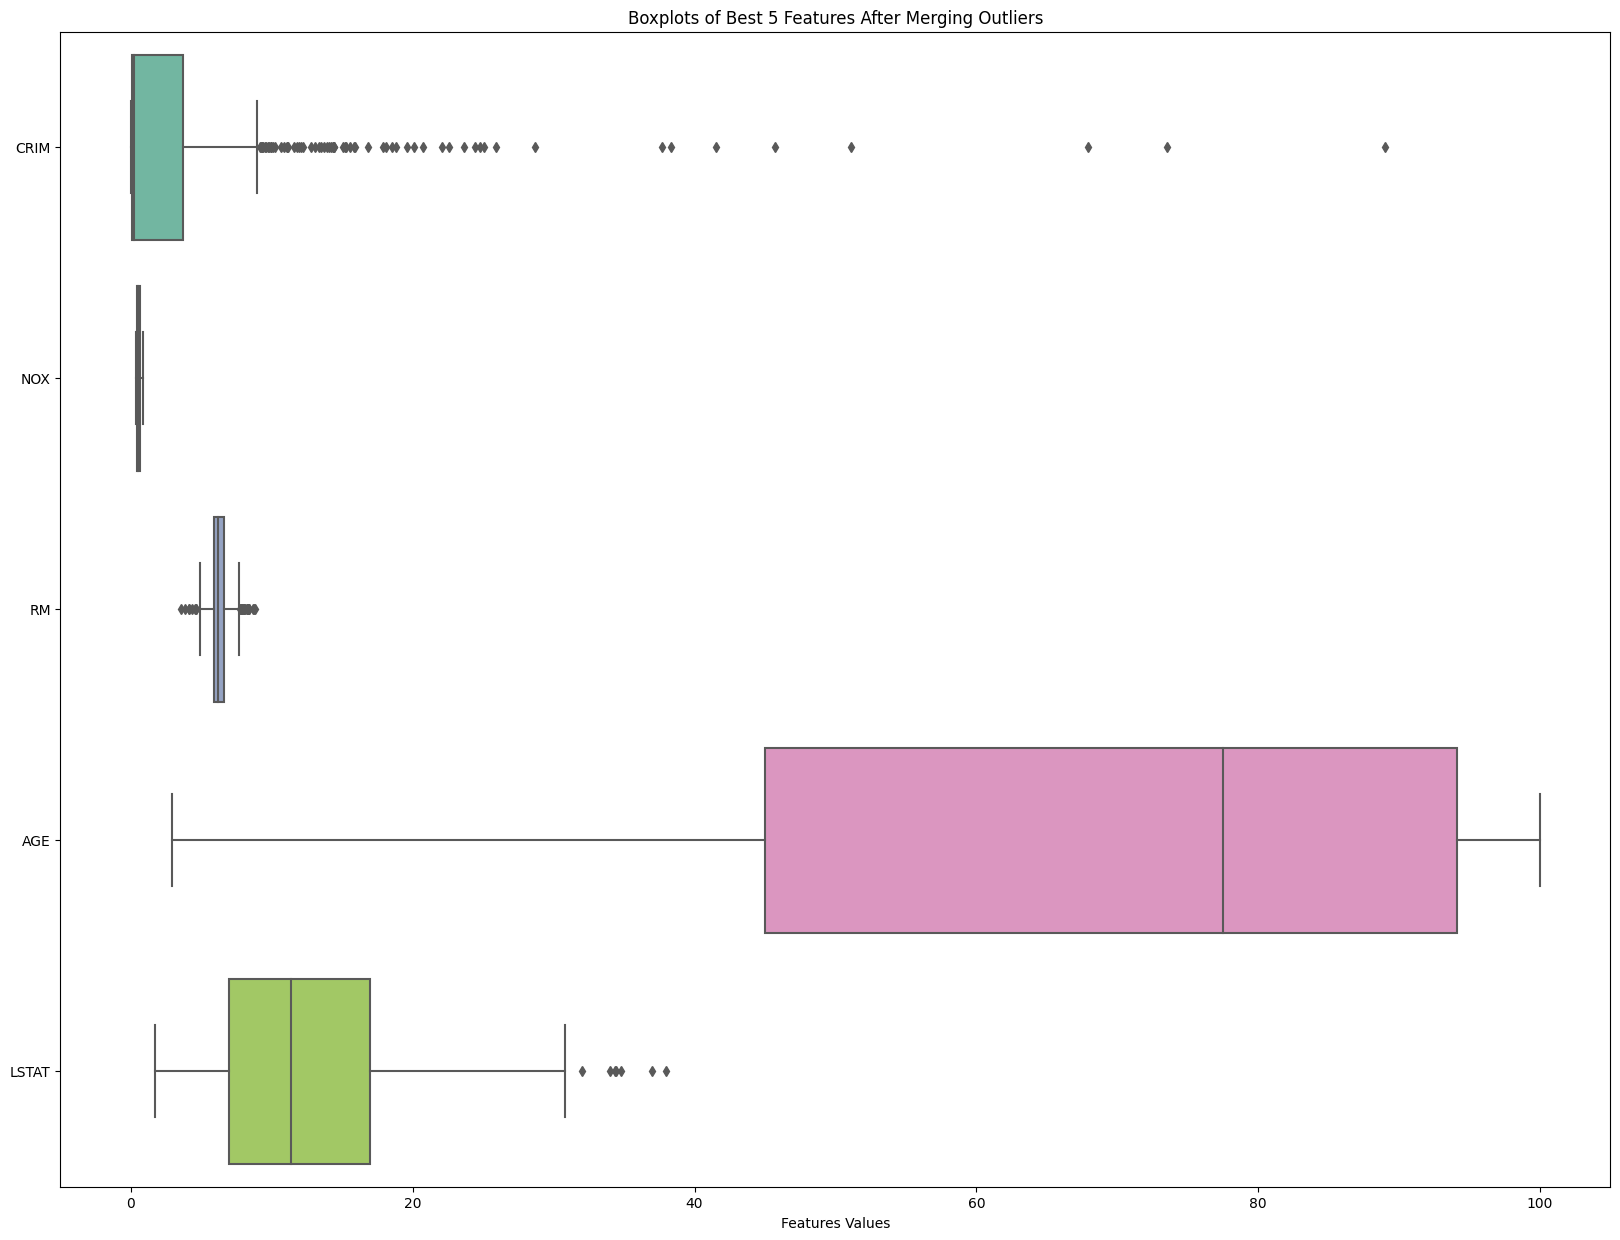

In [ ]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_best, orient="h", palette="Set2")
plt.title('Boxplots of Best 5 Features After Merging Outliers')
plt.xlabel('Features Values')
plt.show()

Models Without using any Hyperparameter Tuning

*   Linear Regression
*   SVM
*   RandomForest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

print(model.intercept_)

Mean Squared Error (MSE): 21.517444231177183
R-squared (R2): 0.7112260057484936
31.631084035693327


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_after_merged, Y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 22.003636414362973
R-squared (R2): 0.7047010831227389


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_best_merged, Y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 29.889306018906442
R-squared (R2): 0.5988717715843243


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_best, Y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 30.219258910873588
R-squared (R2): 0.5944436520779132


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 25.626399937370916
R-squared (R2): 0.6560819310743812


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_after_merged, Y, test_size=0.3, random_state=42)

model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 27.548169445307536
R-squared (R2): 0.630290900742186


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_best_merged, Y, test_size=0.3, random_state=42)

model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 32.083979661083326
R-squared (R2): 0.569418242302643


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_best, Y, test_size=0.3, random_state=42)

model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 30.64402961577688
R-squared (R2): 0.5887430339293032


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 9.619662013157892
R-squared (R2): 0.8708997131330258


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_after_merged, Y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 9.726873052631579
R-squared (R2): 0.8694608916928934


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_best_merged, Y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 12.368736046052629
R-squared (R2): 0.8340058757217099


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_best, Y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 11.718240059210522
R-squared (R2): 0.8427358309313902


Modeling With Hyperparameter Tuning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

alphas = [0.01, 0.1, 1, 10, 100]

best_mse_ridge = float("inf")
best_alpha_ridge = None

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse_ridge:
        best_mse_ridge = mse
        best_alpha_ridge = alpha

print("Best Ridge Alpha:", best_alpha_ridge)
print("Best Ridge MSE:", best_mse_ridge)

best_mse_lasso = float("inf")
best_alpha_lasso = None

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    if mse < best_mse_lasso:
        best_mse_lasso = mse
        best_alpha_lasso = alpha

print("Best Lasso Alpha:", best_alpha_lasso)
print("Best Lasso MSE:", best_mse_lasso)

Best Ridge Alpha: 0.01
Best Ridge MSE: 21.524213182006548
Best Lasso Alpha: 0.01
Best Lasso MSE: 21.696242411252275


In [ ]:
best_ridge_model = Ridge(alpha=best_alpha_ridge)
best_ridge_model.fit(X_train, y_train)

y_pred_ridge = best_ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge MSE:", mse_ridge)

r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge R-squared (R2):", r2_ridge)

best_lasso_model = Lasso(alpha=best_alpha_lasso)
best_lasso_model.fit(X_train, y_train)

y_pred_lasso = best_lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso MSE:", mse_lasso)

r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso R-squared (R2):", r2_lasso)

Ridge MSE: 21.524213182006548
Ridge R-squared (R2): 0.7111351633163308
Lasso MSE: 21.696242411252275
Lasso R-squared (R2): 0.7088264519692221


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

best_alpha_ridge = grid_search_ridge.best_params_['alpha']

best_ridge_model = Ridge(alpha=best_alpha_ridge)
best_ridge_model.fit(X_train, y_train)

ridge_cv_scores = cross_val_score(best_ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_cv_mse = -ridge_cv_scores.mean()
ridge_cv_r2 = cross_val_score(best_ridge_model, X_train, y_train, cv=5, scoring='r2').mean()

y_pred_ridge = best_ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge - Best Alpha:", best_alpha_ridge)
print("Ridge - Cross-Validation MSE:", ridge_cv_mse)
print("Ridge - Cross-Validation R2:", ridge_cv_r2)
print("Ridge - MSE:", mse_ridge)
print("Ridge - R-squared (R2):", r2_ridge)

Ridge - Best Alpha: 0.01
Ridge - Cross-Validation MSE: 25.97867909341082
Ridge - Cross-Validation R2: 0.6879783256237569
Ridge - MSE: 21.524213182006548
Ridge - R-squared (R2): 0.7111351633163308


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

alphas = [0.01, 0.1, 1, 10, 100]

best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    model = Lasso(alpha=alpha)

    mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_mse = mse_scores.mean()

    if avg_mse < best_mse:
        best_mse = avg_mse
        best_alpha = alpha

best_lasso_model = Lasso(alpha=best_alpha)
best_lasso_model.fit(X_train, y_train)

lasso_cv_scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_mse = -lasso_cv_scores.mean()
lasso_cv_r2 = cross_val_score(best_lasso_model, X_train, y_train, cv=5, scoring='r2').mean()

y_pred_lasso = best_lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso - Best Alpha:", best_alpha)
print("Lasso - Cross-Validation MSE:", lasso_cv_mse)
print("Lasso - Cross-Validation R2:", lasso_cv_r2)
print("Lasso - MSE:", mse_lasso)
print("Lasso - R-squared (R2):", r2_lasso)

Lasso - Best Alpha: 0.01
Lasso - Cross-Validation MSE: 26.048645445052408
Lasso - Cross-Validation R2: 0.6873796844086625
Lasso - MSE: 21.696242411252275
Lasso - R-squared (R2): 0.7088264519692221


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

print("Best Hyperparameters:", best_params)

Mean Squared Error (MSE): 10.67153877877067
R-squared (R2): 0.8567830433369802
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_model = RandomForestRegressor(random_state=42, **best_params_rf)
best_rf_model.fit(X_train, y_train)

rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_mse = -rf_cv_scores.mean()
rf_cv_r2 = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2').mean()

y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Best Hyperparameters:", best_params_rf)
print("Random Forest - Cross-Validation MSE:", rf_cv_mse)
print("Random Forest - Cross-Validation R2:", rf_cv_r2)
print("Random Forest - MSE:", mse_rf)
print("Random Forest - R-squared (R2):", r2_rf)

Random Forest - Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Cross-Validation MSE: 14.229850071223103
Random Forest - Cross-Validation R2: 0.831242206265367
Random Forest - MSE: 10.67153877877067
Random Forest - R-squared (R2): 0.8567830433369802
